## Computer Vision Data Analysis Code

In [1]:
# Relevant Imports (Ran in Python 3.9.6)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FormatStrFormatter

import seaborn as sns
sns.set_palette(["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"])
colors = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#AF7AA1", "#FF9DA7"]
good_ok_bad_colors = ["#59A14F", "#F28E2B", "#E15759"]
from matplotlib.transforms import ScaledTranslation

## EXCLUDED

In [5]:
# Count reasons for exclusion
ex_df = pd.read_csv('./excluded.csv')
print(ex_df['Reason'].value_counts())
""" 
Not CV       224
Not CV        78
Not vasc       8
Not vasc       4
Not Vasc       1
"""
not_vasc = 8+4+1
not_cv = 224+78


not_vasc+not_cv

Reason
Not CV       224
Not CV        78
Not vasc       8
Not vasc       4
Not Vasc       1
Name: count, dtype: int64


315

## INCLUDED

In [58]:
# Vascular disease: separate studies based on their area of study
from math import isnan 

in_df = pd.read_csv('./included.csv')
in_df['Vascular Disease/Procedure'].unique()

aortic_kws = ['Abdominal Aortic dissection','Aorta (dissection and aneurysm)', 'General (vessel segmentation), eval on AAA dataset ', 'Aortic dissection (A and B)', 'REBOA ', 'EVAR   ',  'Aortic disease ','Aoritc disease (dissection, IMH + atherosclerotic aortic ulcer)','Aorta  + dissections (A/B) ', 'TBAD ', 'Aorta     ', 'EVAR ','Aorta  ', 'Aorta ','Aortic aneurysms', 'Aortic dissection  ', 'Aortic disease (aneurysm + dissection)', 'Aortic dissection ','EVAR (endoleaks)', 'Aortic dissection (Type B and Type A) + rupture','General (aorta)','Aoritc dissection  ','Aortic aneurysm ', 'TEVAR', 'EVAR, AAA', 'General (aorta segmentation)', 'EVAR, endoleaks','Aortic aneurysm','Thoracic aortic aneurysm''Aortic disease (dissection + rupture)', 'Aorta (thoracic), aortic aneurysm', 'Aorta (ascending - abdominal)', 'AAA (EVAR)', 'Type B Aortic Dissection', 'AAA', 'EVAR', 'FEVAR for complex AAAs', 'Type B Aortic Dissection, TEVAR', 'Aortic dissection (Type B and Type A)', 'AAA (infrarenal)', 'AAA ',]
carotid_kws = ['Carotid stenosis',  'Carotid stenosis ',]
PAD_kws= ['PAD (femoral popliteal disease)',   'PAD (femoral + tibial artery)',  'Popliteal artery aneurysms', 'PAD (femoral)','PAD (femoral endarteretcomy)', 'PAD ', 'PAD', 'PAD (SFA)', 'PAD (Drug coated balloon stent)', 'PAD (Amputation wound healing)', 'EVAR, PAD',]
foot_ulcer_kws = ['Diabetic Foot', 'Leg ulcer (Diabetic foot)', 'Leg ulcer','Diabetic foot', 'Diabetic Foot (infjection)', 'Leg ulcer (venous)', 'General (vasccular dz: foot ulcer but also breast Ca cases)','Leg ulcer ', 'Foot ulcer',]
visceral_kws = ['Visceral arterial aneurysms', 'Superior Mesenteric Artery abnormalities ',]

venous_kws = ['Chronic Venous Insufficiency',  'Varicose ulcers ',]
vasc_gen_kws = ['Aortic disease and carotid stenosis ', 'General (vessel segmentation)', 'General (vscular tress segmentation']

procedural = ['Mechanical thrombectomy', 'Vascular stents', 'Catheter']

lymphedema_kws = ['Lymphedema']

disease_dict = {}
n_aorta, n_carotid, n_pad, n_ulcer, n_visceral, n_venous, n_gen, n_procedural, n_lymph = 0,0,0,0,0,0,0,0,0

counters = [
    n_aorta, 
    n_carotid,
    n_ulcer,
    n_venous,
    n_pad,
    n_gen,
    n_visceral,
    n_lymph,
    n_procedural
]
kws = [
    aortic_kws,
    carotid_kws,
    foot_ulcer_kws,
    venous_kws,
    PAD_kws,
    vasc_gen_kws,
    visceral_kws,
    lymphedema_kws,
    procedural
]
titles = [
    'Aorta',
    'Carotid',
    'Foot ulcer',
    'Venous',
    'PAD', 
    'General',
    'Visceral', 
    'Lymphedema',
    'Procedural'
]

for ix, x in enumerate(list(in_df['Vascular Disease/Procedure'])):
    for counter, kw in zip(range(len(counters)), kws):
        for y in kw:
            if x==y:
                counters[counter]+=1 

for counter, title in zip(counters, titles):
    print(title, ": ", counter, round(counter/288*100, 1))


Aorta :  95 33.0
Carotid :  86 29.9
Foot ulcer :  73 25.3
Venous :  2 0.7
PAD :  18 6.2
General :  4 1.4
Visceral :  2 0.7
Lymphedema :  2 0.7
Procedural :  4 1.4


In [7]:
# Aortic disease: what was their purpose and image types
spec_kw = aortic_kws

spec_df = in_df[in_df['Vascular Disease/Procedure'].isin(aortic_kws)]
general = ['Aortic disease ', 'Aoritc disease (dissection, IMH + atherosclerotic aortic ulcer)', 'Aorta     ', 'Aorta  ', 'Aorta ', 'General (aorta)',  'General (aorta segmentation)', 'Aorta (ascending - abdominal)', 'Aorta (dissection and aneurysm)', 'Aortic disease (aneurysm + dissection)']
dissections = ['Abdominal Aortic dissection', 'Aortic dissection (A and B)', 'Aorta  + dissections (A/B) ', 'Aortic dissection (Type B and Type A)', 'Aortic disease (dissection + rupture)', 'Type B Aortic Dissection', 'TBAD ', 'Aortic dissection  ', 'Aortic dissection ', 'Aortic dissection (Type B and Type A) + rupture', 'Aoritc dissection  ']
aneurysm = ['General (vessel segmentation), eval on AAA dataset ',  'Aortic aneurysms', 'Aortic aneurysm ', 'AAA (infrarenal)', 'AAA ', 'AAA', 'Aortic aneurysm','Thoracic aortic aneurysm', 'Aorta (thoracic), aortic aneurysm']
evar = ['EVAR   ', 'EVAR ', 'EVAR (endoleaks)', 'TEVAR', 'EVAR, AAA', 'EVAR, endoleaks', 'AAA (EVAR)', 'EVAR', 'FEVAR for complex AAAs', 'Type B Aortic Dissection, TEVAR']
reboa = ['REBOA ']



subcategories = [general, dissections, aneurysm, evar, reboa]
titles = ['general', 'dissections', 'aneurysm', 'evar', 'reboa']
total_entries, _= spec_df.shape

for subcat, title in zip(subcategories, titles):
    subcat_df = spec_df[spec_df['Vascular Disease/Procedure'].isin(subcat)]
    num_entries, _= subcat_df.shape
    print(title, num_entries, round((num_entries/total_entries * 100), 1))


segment_kws = ['Segmentation (vessel centerline)',  'Detection+Segmentation+Diagnosis', 'Diagnosis+Semgnetation',  'Diagnosis + Segmentation', 'Segmentation + Diagnosis', 'Segmentation->Diagnosis', 'Segmentaiton', 'Segmentation', 'Detection (aortic dissection complications)',  'Segmentation ', 'Segmentation (inappropriate landing zones)', 'Detection + Segmentation', 'Segmentation (robotic)', 'Segmentation + Diagnosis ', 'Segmentation+Diagnosis', 'Segmentation -> Diagnosis', ]
diagnosis_kws = ['Diagnosis', 'Diagnosis ',] 
measurement_kws = ['Quantification (get aortic diam)',  'Segmentation + Quantification + Diagnosis', 'Segmentation + Quantification', 'Quantification',  'Segmentation and Quantification', 'Quantification (plaque volume)', 'Quantification ', 'Diagnosis + Quantification', 'Segmentation+ Quantification', 'Segmentation->Quantification', 'Quantification + Diagnosis', 'Diagnosis + Segmentation + Quantification', 'Segmentation+Quantification',]
prognosis_kws = ['Prognosis (negative remodelling/need for reintervention, to guide management)', 'Prognosis ', 'Management']
synthetic_kws = ['Synthetic images',]


purpose_kws = [segment_kws, diagnosis_kws, measurement_kws, prognosis_kws, synthetic_kws]
titles = ['Seg', 'Dx', 'Measure', 'Px', 'Syn']

for purpose_kw, title in zip(purpose_kws, titles):
    purpose_df = spec_df[spec_df['Purpose'].isin(purpose_kw)]
    num_entries, _= purpose_df.shape
    print(title, num_entries, round((num_entries/total_entries * 100), 1))


img_types = spec_df['Image Type']
ct = ['CT', 'CTA', 'NCCT']
xr = ['X-ray', 'DSA', 'radiograph', 'Xray', 'Cine-angiograms']
us = ['US', 'Us']
mri = ['MRI', 'MRA']
skin = ['Skin image', 'Skin iamges', 'RBG-D']
thermograph = ['Thermogram', 'Thermograph', 'Infrared', 'infrared', 'thermogram', 'IR']

def part_of(str, lst):
    return any([(x in str) for x in lst])

ct_c, xr_c, us_c, mri_c, skin_c, thermograph_c= 0,0,0,0,0,0
rest_c = 0
n=0
for img in img_types:
    n+=1
    if part_of(img, mri):
        mri_c+=1
    elif part_of(img, ct):
        ct_c+=1
    elif part_of(img, xr):
        xr_c+=1
    elif part_of(img, us):
        us_c+=1
    elif part_of(img, thermograph):
        thermograph_c+=1
    elif part_of(img, skin):
        skin_c+=1
    else:
        print(img)
        rest_c+=1


titles = ['CT', 'US', 'X-ray', 'MRI', 'Skin', 'Thermogram', 'Other']
counters = ct_c, us_c, xr_c, mri_c, skin_c, thermograph_c, rest_c

for counter, title in zip(counters, titles):
    print(title, counter, round((counter/total_entries * 100), 1))

general 13 13.7
dissections 31 32.6
aneurysm 34 35.8
evar 16 16.8
reboa 1 1.1
Seg 56 58.9
Dx 16 16.8
Measure 15 15.8
Px 4 4.2
Syn 4 4.2
CT 81 85.3
US 1 1.1
X-ray 7 7.4
MRI 6 6.3
Skin 0 0.0
Thermogram 0 0.0
Other 0 0.0


In [59]:
# Carotid Artery Disease: What was their purpose and image types

spec_df = in_df[in_df['Vascular Disease/Procedure'].isin(carotid_kws)]

total_entries, _ = spec_df.shape

segment_kws = ['Segmentation (vessel centerline)',  'Detection+Segmentation+Diagnosis', 'Diagnosis+Semgnetation',  'Diagnosis + Segmentation', 'Segmentation + Diagnosis', 'Segmentation->Diagnosis', 'Segmentaiton', 'Segmentation', 'Detection (aortic dissection complications)',  'Segmentation ', 'Segmentation (inappropriate landing zones)', 'Detection + Segmentation', 'Segmentation (robotic)', 'Segmentation + Diagnosis ', 'Segmentation+Diagnosis', 'Segmentation -> Diagnosis', ]
diagnosis_kws = ['Diagnosis', 'Diagnosis ',] 
measurement_kws = ['Quantification (get aortic diam)',  'Segmentation + Quantification + Diagnosis', 'Segmentation + Quantification', 'Quantification',  'Segmentation and Quantification', 'Quantification (plaque volume)', 'Quantification ', 'Diagnosis + Quantification', 'Segmentation+ Quantification', 'Segmentation->Quantification', 'Quantification + Diagnosis', 'Diagnosis + Segmentation + Quantification', 'Segmentation+Quantification',]
prognosis_kws = ['Prognosis (negative remodelling/need for reintervention, to guide management)', 'Prognosis ', 'Management']
synthetic_kws = ['Synthetic images',]


purpose_kws = [segment_kws, diagnosis_kws, measurement_kws, prognosis_kws, synthetic_kws]
titles = ['Seg', 'Dx', 'Measure', 'Px', 'Syn']

for purpose_kw, title in zip(purpose_kws, titles):
    purpose_df = spec_df[spec_df['Purpose'].isin(purpose_kw)]
    num_entries, _= purpose_df.shape
    print(title, num_entries, round((num_entries/total_entries * 100), 1))


img_types = spec_df['Image Type']
ct = ['CT', 'CTA', 'NCCT']
xr = ['X-ray', 'DSA', 'radiograph', 'Xray', 'Cine-angiograms']
us = ['US', 'Us']
mri = ['MRI', 'MRA']
skin = ['Skin image', 'Skin iamges', 'RBG-D']
thermograph = ['Thermogram', 'Thermograph', 'Infrared', 'infrared', 'thermogram', 'IR']

def part_of(str, lst):
    return any([(x in str) for x in lst])

ct_c, xr_c, us_c, mri_c, skin_c, thermograph_c= 0,0,0,0,0,0
rest_c = 0
n=0
for img in img_types:
    n+=1
    if part_of(img, mri):
        mri_c+=1
    elif part_of(img, ct):
        ct_c+=1
    elif part_of(img, xr):
        xr_c+=1
    elif part_of(img, us):
        us_c+=1
    elif part_of(img, thermograph):
        thermograph_c+=1
    elif part_of(img, skin):
        skin_c+=1
    else:
        print(img)
        rest_c+=1


titles = ['CT', 'US', 'X-ray', 'MRI', 'Skin', 'Thermogram', 'Other']
counters = ct_c, us_c, xr_c, mri_c, skin_c, thermograph_c, rest_c

for counter, title in zip(counters, titles):
    print(title, counter, round((counter/total_entries * 100), 1))

print('Total', total_entries)



Seg 60 69.8
Dx 20 23.3
Measure 5 5.8
Px 1 1.2
Syn 0 0.0
CT 8 9.3
US 63 73.3
X-ray 3 3.5
MRI 12 14.0
Skin 0 0.0
Thermogram 0 0.0
Other 0 0.0
Total 86


In [9]:
# Foot Ulcer: What was their purpose and image types

spec_df = in_df[in_df['Vascular Disease/Procedure'].isin(foot_ulcer_kws)]

total_entries, _ = spec_df.shape

segment_kws = ['Segmentation (vessel centerline)',  'Detection+Segmentation+Diagnosis', 'Diagnosis+Semgnetation',  'Diagnosis + Segmentation', 'Segmentation + Diagnosis', 'Segmentation->Diagnosis', 'Segmentaiton', 'Segmentation', 'Detection (aortic dissection complications)',  'Segmentation ', 'Segmentation (inappropriate landing zones)', 'Detection + Segmentation', 'Segmentation (robotic)', 'Segmentation + Diagnosis ', 'Segmentation+Diagnosis', 'Segmentation -> Diagnosis', ]
diagnosis_kws = ['Diagnosis', 'Diagnosis ',] 
measurement_kws = ['Quantification (get aortic diam)',  'Segmentation + Quantification + Diagnosis', 'Segmentation + Quantification', 'Quantification',  'Segmentation and Quantification', 'Quantification (plaque volume)', 'Quantification ', 'Diagnosis + Quantification', 'Segmentation+ Quantification', 'Segmentation->Quantification', 'Quantification + Diagnosis', 'Diagnosis + Segmentation + Quantification', 'Segmentation+Quantification',]
prognosis_kws = ['Prognosis (negative remodelling/need for reintervention, to guide management)', 'Prognosis ', 'Management']
synthetic_kws = ['Synthetic images',]


purpose_kws = [segment_kws, diagnosis_kws, measurement_kws, prognosis_kws, synthetic_kws]
titles = ['Seg', 'Dx', 'Measure', 'Px', 'Syn']

for purpose_kw, title in zip(purpose_kws, titles):
    purpose_df = spec_df[spec_df['Purpose'].isin(purpose_kw)]
    num_entries, _= purpose_df.shape
    print(title, num_entries, round((num_entries/total_entries * 100), 1))


img_types = spec_df['Image Type']
ct = ['CT', 'CTA', 'NCCT']
xr = ['X-ray', 'DSA', 'radiograph', 'Xray', 'Cine-angiograms']
us = ['US', 'Us']
mri = ['MRI', 'MRA']
skin = ['Skin image', 'Skin iamges', 'RBG-D']
thermograph = ['Thermogram', 'Thermograph', 'Infrared', 'infrared', 'thermogram', 'IR']

def part_of(str, lst):
    return any([(x in str) for x in lst])

ct_c, xr_c, us_c, mri_c, skin_c, thermograph_c= 0,0,0,0,0,0
rest_c = 0
n=0
for img in img_types:
    n+=1
    if part_of(img, mri):
        mri_c+=1
    elif part_of(img, ct):
        ct_c+=1
    elif part_of(img, xr):
        xr_c+=1
    elif part_of(img, us):
        us_c+=1
    elif part_of(img, thermograph):
        thermograph_c+=1
    elif part_of(img, skin):
        skin_c+=1
    else:
        print(img)
        rest_c+=1


titles = ['CT', 'US', 'X-ray', 'MRI', 'Skin', 'Thermogram', 'Other']
counters = ct_c, us_c, xr_c, mri_c, skin_c, thermograph_c, rest_c

for counter, title in zip(counters, titles):
    print(title, counter, round((counter/total_entries * 100), 1))

print(n)

Seg 28 38.4
Dx 40 54.8
Measure 4 5.5
Px 0 0.0
Syn 1 1.4
Photoacoustic imaging
Hyperspectral images 
CT 1 1.4
US 0 0.0
X-ray 0 0.0
MRI 0 0.0
Skin 50 68.5
Thermogram 20 27.4
Other 2 2.7
73


In [10]:
# Purpose of the studies
segment_kws = ['Segmentation (vessel centerline)',  'Detection+Segmentation+Diagnosis', 'Diagnosis+Semgnetation',  'Diagnosis + Segmentation', 'Segmentation + Diagnosis', 'Segmentation->Diagnosis', 'Segmentaiton', 'Segmentation', 'Detection (aortic dissection complications)',  'Segmentation ', 'Segmentation (inappropriate landing zones)', 'Detection + Segmentation', 'Segmentation (robotic)', 'Segmentation + Diagnosis ', 'Segmentation+Diagnosis', 'Segmentation -> Diagnosis', ]
diagnosis_kws = ['Diagnosis', 'Diagnosis ',] 
measurement_kws = ['Quantification (get aortic diam)',  'Segmentation + Quantification + Diagnosis', 'Segmentation + Quantification', 'Quantification',  'Segmentation and Quantification', 'Quantification (plaque volume)', 'Quantification ', 'Diagnosis + Quantification', 'Segmentation+ Quantification', 'Segmentation->Quantification', 'Quantification + Diagnosis', 'Diagnosis + Segmentation + Quantification', 'Segmentation+Quantification',]
prognosis_kws = ['Prognosis (negative remodelling/need for reintervention, to guide management)', 'Prognosis ', 'Management']
synthetic_kws = ['Synthetic images',]


n_segment, n_diagnosis, n_quant, n_prognosis, n_synthetic = 0,0,0,0,0

counters = [n_segment, n_diagnosis, n_quant, n_prognosis, n_synthetic]
kws = [segment_kws,diagnosis_kws,measurement_kws,prognosis_kws,synthetic_kws,]
titles = ['Segment', 'Diagnosis', 'Measurement', 'Prognosis', 'Synthetic images',]

for ix, x in enumerate(list(in_df['Purpose'])):
    for counter, kw in zip(range(len(counters)), kws):
        for y in kw:
            if x==y:
                counters[counter]+=1 

for counter, title in zip(counters, titles):
    print(title, ": ", counter)

Segment :  163
Diagnosis :  88
Measurement :  24
Prognosis :  6
Synthetic images :  7


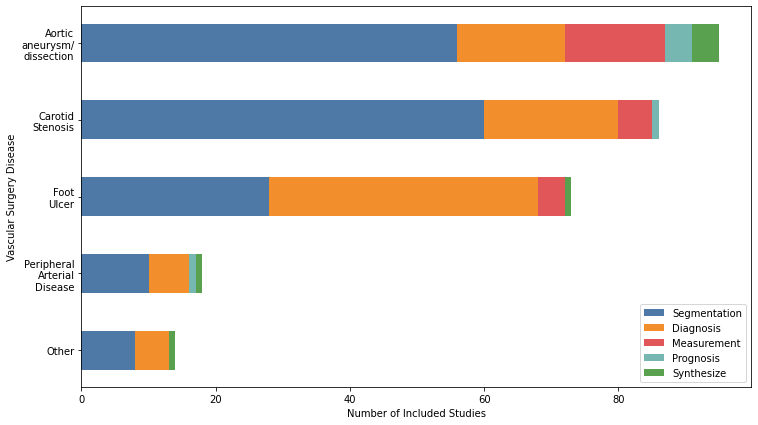

In [60]:
# Plot for Diseases and their Purposes
other_kws = venous_kws + visceral_kws + vasc_gen_kws + lymphedema_kws + procedural
disease_kws = [aortic_kws, carotid_kws, foot_ulcer_kws, PAD_kws, other_kws]
titles = ['Aortic\naneurysm/\ndissection', 'Carotid\nStenosis', 'Foot\nUlcer', 'Peripheral\nArterial\nDisease', 'Other']
purpose_kws = [segment_kws, diagnosis_kws, measurement_kws, prognosis_kws, synthetic_kws]

all_disease_nums = []
for disease_kw in disease_kws:
    disease_nums = []
    for purpose_kw in purpose_kws:
        disease_df = in_df[in_df['Vascular Disease/Procedure'].isin(disease_kw)]
        disease_purpose_df = disease_df[disease_df['Purpose'].isin(purpose_kw)]
        disease_purpose_number = disease_purpose_df.shape[0]
        disease_nums.append(disease_purpose_number)

    all_disease_nums.append(disease_nums)
    
all_disease_nums = np.array(all_disease_nums)

y0, y1, y2, y3, y4= all_disease_nums[:, 0], all_disease_nums[:, 1], all_disease_nums[:, 2], all_disease_nums[:, 3], all_disease_nums[:, 4]
x=titles

plt.barh(x, y0, color=colors[0], label='Segmentation', height=0.5)
plt.barh(x, y1, left=y0, color=colors[1], label='Diagnosis', height=0.5)
plt.barh(x, y2, left=y0+y1, color=colors[2], label='Measurement', height=0.5)
plt.barh(x, y3, left=y0+y1+y2, color=colors[3], label='Prognosis', height=0.5)
plt.barh(x, y4, left=y0+y1+y2+y3, color=colors[4], label='Synthesize', height=0.5)
plt.gca().invert_yaxis()
plt.legend(loc='lower right')
plt.xlabel('Number of Included Studies')
plt.ylabel('Vascular Surgery Disease')
plt.rcParams["figure.figsize"] = (5,5)

In [12]:
# Published year
in_df['Published Year'].value_counts().sort_index()

Published Year
2006     1
2013     1
2016     1
2017     2
2018     8
2019    21
2020    27
2021    41
2022    64
2023    75
2024    47
Name: count, dtype: int64

Text(0.5, 0, 'Publication Year')

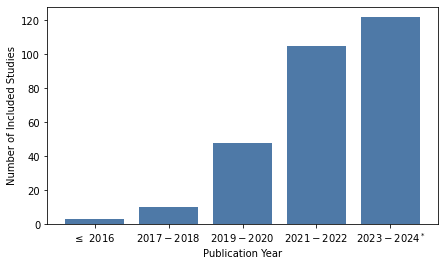

In [14]:
# Great the publication trends

""" 
Time Periods:
<= 2016
2017-2018
2019-2020
2021-2022
2023-2024
"""

yr_titles = [
    "$\leq$ 2016",
    "$2017-2018$",
    "$2019-2020$",
    '$2021-2022$',
    '$2023-2024^*$'
]
pre_2016 = 3
yrs = [
    [2017,2018],
    [2019,2020],
    [2021,2022],
    [2023,2024]
]

yr_vals = [pre_2016]
for yr in yrs:
    yr1, yr2 = yr
    yr_df = in_df[(in_df['Published Year']==yr2) | ((in_df['Published Year']==yr1))]
    yr_num = yr_df.shape[0]
    yr_vals.append(yr_num)

plt.rcParams["figure.figsize"] = (7, 4)
plt.bar(yr_titles, yr_vals, color=colors[0])
plt.ylabel('Number of Included Studies')
plt.xlabel('Publication Year')

In [63]:
# Data Sources

retro_single_kw = ['Retrospective (single)','Retrospective', 'Retropsective', 'Retrospective ',] 
retro_multi_kw  = ['Retrospective (multi)',]
prospective_kw = ['Prospective (single)', 'Prospective  ',  'Prospective (randomized, single-blind)', 'Prospective (multicenter)', 'Prospective', 'Prospective ',  'Prospective multicenter ']
public_kw = ['Open source (web-indexed search)', 'Public ', 'Other Uni dataset  ',  'Public (5)', 'Public (2) ', 'Public + Retropsective', 'Public  ', 'Public (Kaggle DFU-dataset)', 'Public (3)', 'Public (MICCAI)', 'Public',  'Public (MICCAI, NIH)',  'Public (2 datasets)', 'Public (4 datasets)',  'Public (DFUC) + Retrospective (single)',    'Other Uni datasets (chronic foot ulcer and Breast Ca dataset)',]
simulated_kw = ['Simulated dataset', 'Simulated dataset (phantom and porcine)',  'Simulated dataset (phantom) + Public ',  'Simulated (phantom)', 'Simulated dataset (phantom)', 'Simulated dataset (synthetic data for training, real data for validation)  ',]
clinical_trial_kw = ['Clinical Trial (non-randomized)']
       
n_retro_single, n_retro_multi, n_prospective, n_public, n_simulated, n_clinical_trial = 0,0,0,0,0,0

counters = [n_retro_single, n_retro_multi, n_prospective, n_public, n_simulated, n_clinical_trial ]
kws = [retro_single_kw, retro_multi_kw, prospective_kw, public_kw, simulated_kw, clinical_trial_kw]
titles = ['Retrospective: single', 'Retrospective: multi', 'Prospective', 'Public/Shared', 'Simulated', 'Clinical Trial']

for ix, x in enumerate(list(in_df['Data Source'])):
    for counter, kw in zip(range(len(counters)), kws):
        for y in kw:
            if x==y:
                counters[counter]+=1 

for counter, title in zip(counters, titles):
    print(title, ": ", counter, counter/288)

Retrospective: single :  143 0.4965277777777778
Retrospective: multi :  19 0.06597222222222222
Prospective :  42 0.14583333333333334
Public/Shared :  71 0.2465277777777778
Simulated :  6 0.020833333333333332
Clinical Trial :  1 0.003472222222222222


In [17]:
# Data source period 
import numpy as np 
retro_kws = ['Retrospective (single)','Retrospective', 'Retropsective', 'Retrospective ', 'Retrospective (multi)']


retro_in_df = in_df[in_df['Data Source'].isin(retro_kws)]

retro_in_df['Period Start'].value_counts()

retro_in_df_with_period = retro_in_df[~(retro_in_df['Period Start'].isin(['NR', 'N/A', '4 days']))]

starts, ends = retro_in_df_with_period['Period Start'], retro_in_df_with_period['Period end'] 

durations = []
for start, end in zip(starts, ends):
    try:
        duration = int(end)-int(start)
        if duration>=0:
            durations.append(int(end)-int(start))
    except:
        pass


durations = np.array(durations)
print('Max period is: ', max(durations))
print('Min period is: ', min(durations))
print('Median period is: ', np.median(durations))
print('Mean period is: ', np.mean(durations))

print('Number of retrospective with recorded period: ', len(durations))


Max period is:  17
Min period is:  0
Median period is:  3.0
Mean period is:  4.986301369863014
Number of retrospective with recorded period:  73


Dice 110 0.8807860000000002 0.08788348350566738
AUROC 50 0.9224580000000002 0.07849546761437885
Precision 40 0.8779125000000001 0.12593394734443134
Recall 19 0.8494999999999999 0.13746057042313128
Accuracy 105 0.9056838095238096 0.11244963496843886
Sensitivity 53 0.8957532075471698 0.09399454764945066
Specificity 46 0.921167391304348 0.07552895227874634
F1 38 0.8770631578947367 0.1186318463080161
Correlation Coefficient 34 ['0.91', '0.80', '0.84', '0.92', '0.97', '0.81', '0.82', '0.96', '0.94', '0.9801', '0.96', '0.996', '0.89', '0.8931', '0.836', '0.683', '0.728', '0.61', '0.93', '0.90', '0.89', '0.85', '0.967', '0.816', '0.766', '0.728', '0.978', '0.919', '0.96', '0.80', '0.85', '0.9250', '0.879', '0.99']
IoU 22 0.8185454545454545 0.1446768050997958
Hausdorff 12 ['3.8', '1.0', '2.68', '21.5', '2.13mm', '21.2mm', '1.75mm', '0.65', '0.91', '8', '12.11mm', '0.9.775mm']
Error 32 ['0.0.011', '4.0mm', '1.3mm', '2.0mm', '2.7mm', '1.02', '3.11mm2', '01.37mm', '5.75um', '0.124mm', '0.56mm', '

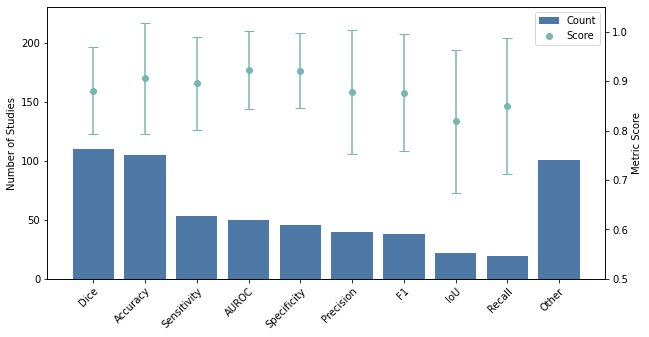

In [64]:
# ALL OUTCOMES
# outcomes = list(in_df['Outcomes'])
# all_outcomes = ','.join(outcomes)
# With this all_outcomes variable, I edited it to get rid of typos and this provided the all_outcomes below
all_outcomes = 'AUROC=0.932, acc=0.860, sens=0.885,DC=0.73,sens=0.834, f1=0.764, froc=0.657, cohen kappa=0.728,AUC=0.75, sens=0.8947, spec=0.9125, ppv=0.9067, npv=0.9012,DC=0.9331,Segmentation: Dice=0.94, correlation coefficient=0.61. Detection: precision=0.995, IoU=0.9996,HD=3.8, dice=0.915, acc=0.988, sens=0.878, spec=0.999,Precision=0.77, kappa=0.85, ,acc=0.985, kappa=0.967,Acc=0.89, median abs diff =2.0mm,Remodelling: AUC=0.884. Reintervention: AUC=0.805,acc=0.9905, recall=0.9818, precision=1, AUC=0.9909, f1=0.9908,DC=0.78 ,DC=0.823,MAP=0.994,DC=0.887,Segmentation: Dec=0.834. Classification: MAPE=0.095, correlation_coeff=0.978,AUC=0.981, F-measure=0.952,Classification: AUC=0.996, acc=0.985, sens=0.980, spec=0.988. Segmentation: DC=0.722, precision=0.749, recall=0.756,sens=0.96, spec=0.96, auc=0.99,Segmentation: DC=0.867, HD=1.0. Classification: intracclass correlation coefficients=1,Acc=0.88,Acc=0.9534,acc=0.75, spec=0.87,acc=0.855,Reduced time=13.74 mins,NR (well),Classification: acc=0.963, f1=0.96. Measurement: acc=0.926, f1=0.93. Segmentation: acc=0.887,acc=0.82, AUROC=0.87,Segmentation: DC=0.9673. Diagnosis: AUC=0.9516, acc=0.9024,AUROC=0.95, precision=0.905,precision=0.854,Segmentation: DC=0.95, HD=2.68. Diagnosis: Sens=0.71, spec=0.85, acc=0.80,Experts tried to distinguish real and synthetic images: 0.71 score,DC=0.85,f1=0.9825, precision=0.9831, recall=0.9818,IoU=0.43, f1=0.53, acc=0.97, sens=0.51, spec=0.99, npv=0.99, ppv=0.62,Time reduction=0.43, mean relative difference = 0.10,sens=0.9157, spec=0.8857,Bounding box: IoU=0.81. Segmentation: IoU=0.75,Not well recorded,MAE=0.0.011, similarity=0.919, dx acc=0.94, f1=0.91,IoU=0.973, DC=0.954,DC=0.8945,acc=0.9432,MAE = 4.0 mm,DC=0.916, time reduced = 0.08%,Segmentation: MAE=1.3 mm. Diagonsis: acc=0.97, sens=0.98, spec=0.96,normalized surface dice=0.92, DC=0.96, time reduction=0.50,AUC=0.98 ,DC=0.74, RMSE=0.56mm,sens=0.93, PPV=0.51, t=30s,Acc=0.9932,DC=0.92, HD=21.5,DC=0.902, boundary distance=1.73 mm,acc=0.9481,acc=0.9381,DC=0.9311, IoU=0.9907,MAE=2.0 mm,Ambiguous,AUC=0.8533, acc=0.97,acc=0.985,DC=0.8105, kappa=0.816, time-reduction=0.09,Sens=0.942, spec=0.965, IoU=0.8251,Correlation coeff=0.96,acc=0.9827, sens=0.9684, spec=0.9892,DC=0.9713,acc=0.991, AUROC=0.99,acc=0.64, AUC=0.87, f1=0.561,MAE=2.7mm, correlation coeff=0.91, acc=0.88,Acc=0.80,aacc=0.998, prec=0.972, ,acc=0.9141, acc=0.967,acc=0.9855, DC=0.7838, correlation coeff=0.80,acc=0.856, AUROC=0.926,AUROC=0.961,f1=0.80,DC=0.8592, acc=0.8793,Detection: acc=0.99. Diagnosis: AUROC=0.94. Diameter error=2.3 mm. AAA and endograft volume: DC=0.95. Endoleak volume: DC=0.53,DC=0.887,Sens=0.95, f1=0.96,DC=0.8745,acc=0.9235, AUROC=0.935,DC=0.86,DC=0.95, HD=2.13 mm, MSE=3.23,DC=0.8977, ,IoU=0.80, DC=0.94,DC=0.84,DC=0.92, HD=21.2 mm,Sens=0.8703, spec=0.8207, AUROC=0.845,MAB: DC=0.946. LIB: DC=0.908. ,MAE=1.02,DC=0.906, overlap index=0.836,DC=0.957,Sesn=0.91, spec=0.86, acc=0.92,Acc=0.9020, precision=0.7500, recall=0.944, f1=0.8316,acc=0.9607,acc=0.91, ,f1=0.593, AUROC=0.824,Acc=0.89,Not well recorded,RMSE=0.32,DC=0.8912, precision=0.9151, recall=0.9350,f1=0.85, ,Not well recorded,acc=0.9508, prec=0.9508, prec=0.9509, sens=0.9508, f1=0.972,IoU=0.973, DC=0.954,f1=0.9197,Precision=0.942, recall=0.837,AUC=0.99,acc=0.9198, correlation coeff=0.84,Acc=0.9546, IOU=0.86,Not applicable,acc=0.901,DC=0.8365, IoU=0.7818,DC=0.95,recall=0.69, precision=0.67, acc=0.69,DC=0.89, correlation coeff=0.92, MAD= 3.2 mm,IoU=0.7825, acc=0.84, DC=0.87,Sens=0.89, spec=0.96, kappa=0.766,AUROC=0.94, correation coeff=0.89. MAE=3.11 mm2. ,f1=0.85, ,sens=0.91, spec=0.86, AUROC=0.89,reliability=0.991,reliability=0.878,DC=0.83,AUROC=0.73, sens=0.75, spec=0.70,Synthetic: MAE=01.37 mm. Diagnosis: acc=0.8077, sens=0.9600, spec=0.6676,NR,DC=0.92,DC=0.83, acc=0.79, prec=0.91, recall=0.70, f1=0.79,MAD=1.2mm, DC=0.87,Sens=0.921, spec=0.956, acc=0.921, f1=0.921,AUC=0.8533, acc=0.97,DC=0.9151,AUC=0.90, correlation coeff=0.97, ,TPA=0.8 mm^2. ,DC=0.9311, IoU=0.9907,acc=0.89,Not well recorded,DC=0.90,DC=0.80, Correlation coeff=0.80,DC=0.94  ,acc=0.915, AUROC=0.987, sens=0.902, spec=0.977,DC=0.95, MAD=0.042 mm,AUROC=0.94, acc=0.90, sens=0.918, spec=0.882,acc=0.95, precision=0.90, recall=1,DC=0.92, time reduction=0.12,acc=0.97,DC=0.905, ,acc=0.96,Acc=0.86,AUROC=0.9566,DC=0.84,sens=0.89,, spec=0.85, prec=0.85, acc=0.87, f1=0.87, auc=0.89,correlation coeff=0.81, mean error=0.04, acc=0.87,acc=0.82,DC=0.94,Not well recorded,DC=0.96, acc=0.92,acc=0.891, sens=0.89, spec=0.88,acc=0.9793, prec=0.9794, sens=0.9793, (diagnosis) acc=0.9833,DC=0.94,Acc=0.88, correlation coeff=0.82, ,precision=0.918,acc=0.9954, mean deviation=0.06645 mm, acc=0.9833,prec=0.722, sens=0.9, spec=0.947, IoU=0.66, DC=0.77, ,DC=0.93 ,Dissection: sens=0.878, spec=0.960. Rupture: sens= 1, spec=0.96,MAD=0.08 mm ,MAD (cIMT)=0.124 mm,DC=0.82,sens=0.804, spec=0.965, DC=0.81, overlap index=0.683, HD=1.75mm, AUROC=0.897,sens=0.733, spec=0.946,Sens=0.76, spec=0.86,Spec=0.95, sens=0.77,DC=0.88, jaccard=0.78,Acc=0.99,accuary=0.919,acc=0.9820, sens=0.9857, spec=0.9765, prec=0.9860, f1=0.9856,AUC=0.917, acc=0.842, prec=0.929, recall=0.867, f1=0.897,AUROC=0.99, sens=1, spec=0.907,DC=0.927,acc=0.9882, sens=0.9941, spec=0.9574 ,precision=0.5862 ,DC=0.736, IoU=0.583, kappa=0.728, HD=0.65 ,TP=0.916,DC=0.96, VOE=0.047 ,DC=0.917, Intraclass correlation=0.90,DC=0.95, ,ED=0.9596, IOU=0.9792, PREC=0.9853, RECALL=0.9757,Correlation coeff=0.85, IoU=0.78,AUROC=0.97, correlation coeff=0.96,DC=0.90,Acc=0.974, sens=0.951, spec=1, prec=1, f1=0.97, correlation coeff=0.94,acc=0.9906, prec=1, recall=0.9818, spec=1, f1=0.9908, AUROC=0.9909,AUROC=0.97, f1=0.93,IoU=0.69, recall=0.72, prec=0.77, f1=0.75, prec=0.71,NR,acc=0.9411,DC=0.87, IoU=0.795, sens=0.90, spec=0.985,precision=0.90, recall=0.61,acc=0.9294 ,DC=0.91, Avg distsance=0.12,DC=0.8888, HD=0.91,AUROC=0.9893, acc=0.9578, sens=0.9427, spec=0.9688, f1=0.9491,DC=0.909, IoU=0.839, acc=0.993, spec=0.996,DC=0.95, HD=8, Mean surface distance=0.76,acc=0.85, sens=0.9, spec=0.8,DC=0.89, MAD=2mm,Not well recorded ,Not well recorded,f1=0.813, acc=0.824, prec=0.991, sens=0.692,acc=0.9887, prec=0.9901, recall=0.9873, f1=0.9886,DC=0.9207, 0.888,DC=0.90,Acc=0.9461, sens=0.9754, spec=0.8667, f1=0.9636, prec=0.9520,AUC=0.89, acc=0.95,Segmentation: IoU=0.9837, DC=0.9917,Not wel recorded,AUROC=0.999,AUROC=0.81, acc=0.82, f1=0.87,acc=0.9905, prec=0.9899, recall=0.9901, correlation coeff=0.9801, f1=0.9904,sens=0.9844, f1=0.98,AUROC=0.95 ,DC=0.95, MAD=0.147 mm, time reduction=0.26,Correlation coeff=0.9250,Not well recorded,Correlation coeff=0.879,DC=0.88,acc=0.52 ,acc=0.90 ,DC=0.75 ,MAD=-1.5mm, p=0.48,acc=0.992,DC=0.9669,prec=0.943, sens=0.958, f1=0.950,Not wel recorded,DC=0.9726,DC=0.915, correlation coefficient=0.93,DC=0.90. sens=0.91, spec=0.95,Total overlap=0.8931, DC=0.8730, jaccard=0.7809, FN=0.1068, FP=0.1358,AUROC=0.988 ,DC=0.85 ,acc=0.9714 ,MAE= 5.75 um,DC=0.86, acc=0.095,acc=0.95,JS=0.9086, acc=0.975, MAD=0.01 mm,f1=0.96,IoU=0.7317 ,DC=0.9072,recall=0.77, prec=0.72, DC=0.74,DC=0.854, prec=0.874, recall=0.838,sens=0.991, spec=0.932, AUROC=0.974, DC=0.875,acc=0.966 ,AUROC=0.985 ,aa=0.9955, spec=0.9806, sens=0.9566,DC=0.90, HD=12.11 mm,f1=0.7992, JI=0.6024, DC=0.7423,DC=0.851, sens=0.922,DC=0.847,Segmentation: DC=0.93. Diagnosis: acc=0.921, sens=0.881, spec=0.957,AUROC=0.938, acc=0.915, sens=0.90, spec=0.929,Recall=0.575, prec=0.525,DC=0.89896, sens=0.95682, spec=0.9970, HD=0.9.775mm,AUROC=0.62,Not well recorded,DC=0.85, prec=0.926,acc=0.9486,f1=0.868, acc=0.776,DC=0.9755, correlation coeff=0.96 ,DC=0.96, ,DC=0.84, correlation coeff=0.996 ,time reduction=0.37, ,Correlation coeff=0.99, for TPA: CC=0.89,Not wel recorded,sens=0.75, spec=0.80, acc=0.83,DC=0.933, AUC=0.996 ,Not weell recorded,DC=0.33,DC=0.949,f1=0.7355, prec=0.6587,DC=0.8459, acc=0.81 ,Not well recorded,AUROC=0.967, acc=0.929,acc=0.861 ,AUROC=0.98'
all_outcomes = all_outcomes.replace('. ', ',')
all_outcomes = all_outcomes.replace(' ', '')
import re

dice_kws = ['DC=', 'Dice=', 'dice=', 'Dec=']
auroc_kws = ['AUC=', 'AUROC=','auc=']
prec_kws = ['prec=', 'precision=', 'Precision=','MAP=','PREC=']
recall_kws= ['recall=','RECALL=','Recall=']
acc_kws = ['acc=', 'accuracy=', 'Acc=','accuary=','aa=']
sens_kws = ['sens=', 'sensitivity=','Sens=','Sesn=']
spec_kws = ['spec=', 'specificity=','Spec=']
f1_kws = ['f1=','F-measure=']
correlation_coeff_kws = ['correlationcoeff=', 'CC=','Totaloverlap=','overlapindex=','cohenkappa=', 'correlationcoefficient=', 'Intraclasscorrelation=', 'correationcoeff=', 'kappa=','correlation_coeff=','similarity=','Correlationcoeff=']
iou_kws = ['IoU=','IOU=']
hd_kws = ['hd=', 'HD=']
mae_kws = ['MAE=','MAD(cIMT)=','RMSE=','ED=','VOE=','Diametererror=','meanrelativedifference=','boundarydistance=','MAPE=','MSE=','MAD=','medianabsdiff=','meanerror=','meandeviation=','Avgdistsance=','Meansurfacedistance=']
time_kws = ['time-reduction=', 't=','timereduction=','Reducedtime=','Timereduction=','timereduced=']
ppv_kws = ['ppv=','PPV=']
npv_kws = ['npv=']
jaccard_kws = ['jaccard=','JS=','js=','JI=']
tp_kws = ['tp=','TP=','Tp=']
fp_kws = ['fp=', 'Fp=','FP=']
tn_kws = ['tn=','Tn=','TN=']
fn_kws = ['fn=', 'Fn=','FN=']
reliability_kws=['reliability=']

dices, aurocs, precs, recalls, accs, senss, specs, f1s, ccs, ious, hds,maes,times,ppvs,npvs,jaccards,tps,tns,fps,fns,reliables = [],[],[],[],[],[],[],[],[], [], [],[],[], [], [],[],[],[],[],[],[]

outcome_metrics = [
    [dice_kws, dices],
    [auroc_kws, aurocs],
    [prec_kws, precs],
    [recall_kws, recalls],
    [acc_kws, accs],
    [sens_kws, senss],
    [spec_kws, specs],
    [f1_kws, f1s],
    [correlation_coeff_kws, ccs],
    [iou_kws, ious],
    [hd_kws, hds],
    [mae_kws, maes],
    [time_kws, times],
    [ppv_kws, ppvs],
    [npv_kws, npvs],
    [jaccard_kws, jaccards],
    [tp_kws, tps],
    [tn_kws, tns],
    [fp_kws, fps],
    [fn_kws, fns],
    [reliability_kws, reliables]
]

for outcome_metric in outcome_metrics:
    kws, outcome_lst = outcome_metric
    for kw in kws:
        new_all_outcomes = []
        for substr in all_outcomes.split(kw):
            try:
                if substr[0].isalpha():
                    new_all_outcomes.append(substr)
                else:
                    metric, rest_of_substr = substr.split(',')[0], ','.join(substr.split(',')[1:])
                    outcome_lst.append(metric)
                    new_all_outcomes.append(rest_of_substr)
            except:
                metric, rest_of_substr = substr.split(',')[0], ','.join(substr.split(',')[1:])
                outcome_lst.append(metric)
                new_all_outcomes.append(rest_of_substr)
        all_outcomes = ','.join(new_all_outcomes)


dont_avg_lst = ['Correlation Coefficient','Error','Hausdorff','Time', 'Jaccard', 'PPV', 'NPV', 'Reliability', 'TP','FP','FN','TN']
combo_counts = 0
bar_plot_entries = []
outcome_titles = ['Dice', 'AUROC', 'Precision', 'Recall', 'Accuracy', 'Sensitivity', 'Specificity', 'F1', 'Correlation Coefficient', 'IoU', 'Hausdorff','Error','Time','PPV','NPV','Jaccard','TP','TN','FP','FN','Reliability']
for title, outcome_metric in zip(outcome_titles, outcome_metrics):
    outcome_metric_vals = outcome_metric[1]
    outcome_metric_vals = [x for x in outcome_metric_vals if not(x=='')]
    num_of_instances = len(outcome_metric_vals)
    if not(title in dont_avg_lst):
        outcome_metric_vals = [float(x) for x in outcome_metric_vals]
        outcome_metric_vals  = np.array(outcome_metric_vals)
        outcome_metric_mean,  outcome_metric_std = np.mean(outcome_metric_vals), np.std(outcome_metric_vals)
        print(title, num_of_instances, outcome_metric_mean,  outcome_metric_std)
        bar_plot_entries.append([title, num_of_instances, outcome_metric_mean, outcome_metric_std])
    else:
        print(title, num_of_instances, outcome_metric_vals)
        combo_counts+=num_of_instances
bar_plot_entries.sort(key=lambda x: x[1], reverse=True)
bar_plot_entries.append(['Other', combo_counts, 0, 0])

plt_outcome_titles = [x[0] for x in bar_plot_entries]
plt_outcome_counts = [x[1] for x in bar_plot_entries]
plt_outcome_score = [x[2] for x in bar_plot_entries[:-1]]
plt_outcome_std = [x[3] for x in bar_plot_entries[:-1]]

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

fig.set_size_inches(10, 5)

plt_bars = ax1.bar(plt_outcome_titles, plt_outcome_counts, color=colors[0], label='Count')
ax1.set_ylim([0, 230])
# ax2.set_yticks([0,25, 50, 75, 100])
ax1.set_ylabel('Number of Studies')
plt_scores = ax2.scatter(plt_outcome_titles[:-1], plt_outcome_score, c=colors[3], label='Score')
ax2.errorbar([x for x in range(len(plt_outcome_score))], plt_outcome_score, yerr=plt_outcome_std, fmt='.', c=colors[3], markersize=3, capsize=5)
ax2.set_ylim([0.5,1.05])
ax1.set_xticks(range(len(plt_outcome_titles)), labels=plt_outcome_titles,
              rotation=45, ha="right", rotation_mode="anchor")
ax2.set_ylabel('Metric Score')

pts = [plt_bars, plt_scores]
labs = [pt.get_label() for pt in pts]
ax1.legend(pts, labs, loc='upper right')


In [22]:
# Explainability and External Validation

ex_val = list(in_df['External Validation Outcomes'])
n_ex_val = 0

for x in ex_val:
    if ('1' in str(x)):
        n_ex_val+=1

exp_val = list(in_df['Explainability?'])
n_exp = 0

exp_methods = []
for x in exp_val:
    if ('1' in str(x)):
        exp_method = str(x).split('(')[-1]
        exp_methods.append(exp_method)
        n_exp+=1

print('external validation: ', n_ex_val)
print('explainability: ', n_exp)

# for exp_method in exp_methods:
#     print(exp_method)

# I just went through this list and summarized the main methods

external validation:  30
explainability:  41


In [24]:
sample_size = list(in_df['Sample Size'])

# Needed to edit these appropriately (had to split images and patients into separate entries)
sample_size = [
    '195',
    '59',
    '400',
    '56',
    '376',
    '88',
    '500',
    '(2495 images)',
    '323',
    '445',
    '(3259 images)',
    '50',
    '(100 images)',
    '147',
    '6963',
    '9',
    '51',
    '105',
    '(3356 images)',
    '30',
    '(5749 images)',
    '27',
    '400',
    '66',
    '352',
    '6',
    '1944',
    '56',
    '216',
    '(350 images)',
    '60',
    '1470',
    '(2549 images)',
    '105',
    '760',
    '(1057 images)',
    '844',
    '(1270 images)',
    '460',
    '137',
    '264',
    '144',
    '(506 images)',
    '1055',
    '110',
    '(369 images)',
    '121',
    '81',
    '(203 images)',
    '101',
    '(891 images)',
    '1749',
    '22',
    '(13200 images)',
    '133',
    '(306 images)',
    '355',
    '240',
    '30',
    '73',
    '240',
    '436',
    '20000',
    '33',
    '1017',
    '36',
    '108',
    '265',
    '87',
    '(460 images)',
    '1488',
    '67',
    '(272 images)',
    '84',
    '167',
    '(334 images)',
    '5890',
    '93',
    '56',
    '679',
    '167',
    '200',
    '400',
    '15863',
    '315',
    '90',
    '10',
    '361',
    '630',
    '187',
    '346',
    '1639',
    '93',
    '191',
    '(334 images)',
    '45',
    '(153 images)',
    '2500',
    '70',
    '245',
    '19',
    '162',
    '100',
    '3',
    '623',
    '(1148 images)',
    '36',
    '825',
    '(1647 images)',
    '115',
    '(213 images)',
    '49',
    '29',
    '(80 images)',
    '47',
    '156',
    '3331',
    '153',
    '12216',
    '11689',
    '727',
    '300',
    '10',
    '(84 images)',
    '73',
    '(128 images)',
    '909',
    '56',
    '167',
    '196',
    '60',
    '885',
    '333',
    '5890',
    '340',
    '171',
    '122',
    '4122',
    '465',
    '434',
    '7851',
    '1700',
    '130',
    '379',
    '26',
    '25',
    '52',
    '(222 images)',
    '28',
    '(547 images)',
    '43',
    '(164 images)',
    '74',
    '154',
    '30',
    '42',
    '295',
    '345',
    '(551 images)',
    '1463',
    '547',
    '68',
    '99',
    '(970 images)',
    '144',
    '(36000 images)',
    '400',
    '24',
    '37',
    '(74 images)',
    '268',
    '120',
    '(17050 images)',
    '139',
    '170',
    '70',
    '80',
    '150',
    '889',
    '(1109 images)',
    '30',
    '23',
    '346',
    '101',
    '110',
    '800',
    '1459',
    '15',
    '(50 images)',
    '2',
    '1057',
    '153',
    '(501 images)',
    '10',
    '(5800 images)',
    '38',
    '(144 images)',
    '68',
    '1775',
    '261',
    '(9450 images)',
    '445',
    '276',
    '778',
    '110',
    '203',
    '(396 images)',
    '13',
    '29',
    '15',
    '56',
    '262',
    '(12 images)',
    '25',
    '60',
    '190',
    '94',
    '1048',
    '7',
    '420',
    '(1773 images)',
    '284',
    '(687 images)',
    '(201 images)',
    '4',
    '200',
    '153',
    '247',
    '(971 images)',
    '216',
    '190',
    '(379 images)',
    '(2220 images)',
    '960',
    '555',
    '(16079 images)',
    '(3329 images)',
    '334',
    '87 (3481 images)',
    '1562',
    '(2747 images)',
    '(568 images)',
    '21',
    '(12355 images)',
    '144',
    '(510 images)',
    '(1211 images)',
    '(565 images)',
    '191',
    '20',
    '15',
    '(2439 images)',
    '844',
    '844',
    '2000',
    '493',
    '(1362 images)',
    '167',
    '104',
    '1459',
    '493',
    '2826',
    '397',
    '2263',
    '139',
    '42',
    '28',
    '(222 images)',
    '120',
    '1210',
    '100',
    '30',
    '100',
    '250',
    '100',
    '60',
    '30',
    '(175 images)',
    '59',
    '(248 images)',
    '189',
    '321',
    '60',
    '30',
    '100',
    '100',
    '70',
    '(1010 images)',
    '98',
    '(302 images) ',
    '279',
    '(61190 images)',
    '154',
    '13',
    '(34 images)',
    '(1210 images)',
    '(74 images)',
    '130',
    '226',
    '280',
    '1250',
    '391',
    '100',
    '16',
    '198',
    '100',
    '400',
    '28',
    '(100 images)',
    '50',
    '273',
    '4050',
    '27',
    '(2138 images)',
    '1872',
    '2835',
    '144',
    '18',
    '250',
    '65',
    '63',
    '25',
    '444',
    '(4200 images)',
    '115',
    '60',
    '154',
    '(431 images)',
    '75',
    '(11243 images)',
]

num_imgs = []
num_pts = []

for ss in sample_size:
    if ('ima' in ss):
        num_img = ss.split(' ima')[0]
        num_img = num_img.split('(')[-1]
        num_img = int(num_img)
        num_imgs.append(num_img)
    else:
        num_pt = int(ss) 
        num_pts.append(num_pt)

num_imgs = np.array(num_imgs)
num_pts = np.array(num_pts)

print('Number of Images: n=', num_imgs.shape[0], '; median = ', np.median(num_imgs), '; min = ', np.min(num_imgs), '; max= ', np.max(num_imgs))
print('Number of Patients: n=', num_pts.shape[0], '; median = ', np.median(num_pts), '; min = ', np.min(num_pts), '; max= ', np.max(num_pts))

Number of Images: n= 73 ; median =  565.0 ; min =  12 ; max=  61190
Number of Patients: n= 257 ; median =  153.0 ; min =  2 ; max=  20000


In [26]:
# Validation Methods
validation_methods = in_df['Validation Method']
train_test_split = in_df['Train/Test/Validate']


validation_methods = [
    '5-fold cross validation', 
    '4-fold cross validation',
    'Leave-one-out',
    '3-fold cross validation',
    '4-fold cross validation',
    '10-fold cross validation',
    '2-fold cross validation',
    '5-fold cross validation', 
    '10-fold cross validation', 
    '10-fold cross validation', 
    '4-fold cross validation',
    '3-fold cross validation', 
    '5-fold cross validation',
    'leave-one-out',
    '4-fold cross validation',
    '5-fold cross validation', 
    '5-fold cross validation',
    '5-fold cross validation',
    '5-fold cross validation', 
    '5-fold cross validation',
    '5-fold cross validation',
    '10-fold cross validation',
    '5-fold cross validation',
    '5-fold cross validation', 
    '5-fold cross validation', 
    '5-fold cross validation', 
    '5-fold cross validation', 
    'leave-one-out', 
    'leave-one-out',
    'leave-one-out', 
    '9-fold Cross validation', 
    '5-fold cross validation', 
    '10-fold cross validation', 
    '5-fold cross validation', 
    '5-fold cross validation', 
    '5-fold cross validation', 
    '5-fold cross validation', 
    '5-fold cross validation', 
    '4-fold cross validation', 
    '5-fold cross validation', 
    '4-fold cross-validation', 
    '5-fold cross validation', 
    '10-fold cross validation', 
    '5-fold cross validation', 
    '10-fold cross validation', 
    '5-fold cross validation', 
    'leave-one-out', 
    '4-fold cross validation', 
    '5-fold cross validation', 
    '6-fold cross validation', 
    '5-fold cross validation', 
    '3-fold cross validation',
    '10-fold cross validation', 
    '5-fold cross validation', 
    '5-fold cross validation',
    '6-fold cross validation', 
    '5-fold cross validation',
    '10-fold cross validation',
    '10-fold cross validation', 
    '5-fold cross validation',
    '5-fold cross validation', 
    '3-fold cross validation', 
    '10-fold cross validation', 
    '5-fold cross validation', 
    '10-fold cross validation', 
    '4-fold cross validation', 
    '3-fold cross validation', 
    '10-fold cross validation', 
    '4-fold cross validation', 
    'leave-one-out', 
    '10-fold cross validation', 
    '5-fold validation ', 
    '10-fold cross validation', 
    '5-fold cross validation', 
    'leave-one-out', 
    '5-fold cross validation', 
    '5-fold cross validation', 
    '5-fold cross validation', 
    '5-fold cross validation', 
    '10-fold cross validation ',
    '5-fold cross validation',
    'leave-one-out', 
    '3-fold cross validation ',
    '5-fold cross validation ', 
    '4-fold cross validation',
    '10-fold cross validation ', 
    '5-fold cross validation', 
    '10-fold cross validation', 
    '5-fold cross validation', 
    '5-fold cross validation', 
    '5-fold cross validation',
    '5-fold cross validation ', 
    '3-fold cross validation', 
    '3-fold cross validation', 
    '5-fold cross validation', 
    '5-fold cross validation ',
    '5-fold cross validation', 
    '4-fold cross validation', 
    '4-fold cross-validation ', 
    '10-fold cross validation', 
    '5-fold cross validation', 
    '10-fold cross validation',
    '9-fold Cross validation', 
    '10-fold cross validation ',
    '6-fold cross validation',
    '5-fold cross validation', 
    '3-fold cross validation', 
    '6-fold cross validation']

FOLD = '-fold'
methods = []
for val_method in validation_methods:
    if (FOLD in val_method):
        cross_val_num = int(val_method.split(FOLD)[0])
        methods.append(cross_val_num)
    elif ('eave' in val_method):
        methods.append('LOO')
    else:
        print(val_method)

df = pd.DataFrame(methods, columns = ['Method'])
print(df['Method'].value_counts())
print(df.shape)

Method
5      50
10     21
4      12
LOO     9
3       9
6       4
9       2
2       1
Name: count, dtype: int64
(108, 1)


In [27]:
# Train_test_splits  
train_test_splits = [
    '80/20',
    '60/30/10', 
    '60/30/10',
    '80/20', 
    '80/10/10',
    '83/17',
    '67/33',
    '70/20/10',
    '(7/9) / (2/9)',
    '15/41 ',
    '70/15/15',
    '41/59',
    "80/10/10",
    '60/20/20',
    '80/20',
    '67/33',
    '70/20/10',
    '67/33', 
    "80/10/10", 
    '70/15/15',
    "80/10/10",
    '80/20', 
    '70/20/10', 
    '63/20/17', 
    '70/30', 
    '80/10/10', 
    "80/10/10", 
    "80/20", 
    "65/12/22", 
    "85/10/5", 
    '62.5/12.5/25',
    '67/33', 
    "87/7/6", 
    '66/14/20', 
    '70/30', 
    '70/30', 
    '70/30', 
    "97/3", 
    '63/37', 
    '70/30', 
    '70/30', 
    '70/15/15', 
    '80/20', 
    '50/25/25', 
    '80/20', 
    '70/15/15', 
    '75/25', 
    '70/30', 
    '80/20',
    "90/10", 
    "60/30/10", 
    "50/50", 
    "50/50", 
    '80/20', 
    '50/50', 
    "80/5/15", 
    "90/10", 
    "90/10", 
    '85/15',
    '67/18/15', 
    "85/5/10", 
    '80/20', 
    '80/20', 
    '80/20', 
    '64/25/11', 
    '80/20', 
    "80/10/10", 
    '70/30', 
    "30/6'", 
    '65/17/18', 
    '60/20/20', 
    '80/20',
    "80/10", 
    '80/20', 
    '80/20', 
    '67/33', 
    '60/25/15', 
    '80/20', 
    '75/25', 
    '65/35', 
    "70/10/20", 
    '80/20', 
    "87/8/5", 
    '80/20', 
    '50.25/25', 
    '75/25', 
    "90/10", 
    '80/20', 
    '80/20', 
    '80/20', 
    '60/20/20',
    "90/10", 
    '85/15', 
    '75/25', 
    "75/10/15", 
    '75/17/17', 
    '80/20', 
    "90/10", 
    '80/20',
    '70/15/15', 
    '75/25', 
    '80/20', 
    "35/7",
    '70/30', 
    "90/10", 
    "80/20", 
    '67/33', 
    '75/25',
    "90/10", 
    "67/33", 
    '80/20', 
    '80/20',
    '67/33', 
    '85/15', 
    '67/17/17', 
    '85.5/5/9.5', 
    '70/20/10',
    '80/20', 
    "40/10/20", 
    '80/13/7', 
    "90/10",
    "20/3", 
    "90/10", 
    "90/10", 
    "70/30", 
    "90/10", 
    '70/20/10', 
    '66/33', 
    "90/10",
    "80/20", 
    '65/25/15', 
    '75/25', 
    "90/10", 
    '80/20', 
    "90/10", 
    '66/22/11', 
    '53/27/10', 
    '80/20', 
    "82/18", 
    "90/10", 
    '75/25',
    "90/10", 
    "80/10/10", 
    "90/10", 
    "80/10/10",
    '80/20', 
    "80/20", 
    "74/8/8", 
    "6/1", 
    "80/20",
    "75/8/13", 
    "70/30",
    "6/1", 
    "70/15/15", 
    "80/20", 
    "80/10/10", 
    "72/18/10", 
    "80/20", 
    "80/20", 
    "80/20", 
    "70/20/10", 
    '50/25/25', 
    "70/15/15", 
    "70/30", 
    "80/20", 
    "95/5", 
    "85/10/5", 
    '70/20/10', 
    "70/30", 
    "80/20", 
    "93/7", 
    "70/20/10", 
    "60/20/20", 
    '70/15/5', 
    "88/12", 
    "90/10", 
    "80/20", 
    "90/10", 
    "80/20",
    "80/20", 
    "80/15/5", 
    "90/10", 
    "80/20", 
    "64/16/20", 
    "80/20", 
    "70/10/20", 
    "80/20", 
    "85/15", 
    "60/20/20",
    '65/17.5/17.5', 
    '67/33', 
    '67/33', 
    "80/20", 
    "80/20", 
    "85/5/10", 
    '67/20/13', 
    "60/30/10", 
    "80/20", 
    "80/10/10", 
    "80/20", 
    "75/25", 
    "80/20", 
    "70/30",
    "54/33/13", 
    "80/20", 
    "90/10",
    "50/50",
    '87/6.5/6.5',
    "80/20", 
    '40/50/10', 
    "80/20", 
    "90/10", 
    "80/20", 
    "75/25", 
    "60/20/20", 
    "50/50",
    "80/20", 
    "89/11",
    "80/20", 
    "80/20",
    "80/20", 
    "80/20", 
    "85/15", 
    "70/30", 
    "90/10",
    "65/25/15", 
    '60/20/20',
    "70/30",
    "90/10", 
    "80/20", 
    "70/20/10", 
    "57/43",
    "50/50", 
    "84/16", 
    "80/20",
    "80/20", 
    "80/20", 
    "70/17/13", 
    "67/33", 
    '50/17/33'
]

pd.set_option("display.max_rows", None)
tt_split_df = pd.DataFrame(train_test_splits)
print(tt_split_df.value_counts())
pd.set_option("display.max_rows", 20)


80/20            65
90/10            25
70/30            16
67/33            11
80/10/10         11
75/25            10
70/20/10          9
70/15/15          7
60/20/20          7
50/50             6
85/15             5
60/30/10          4
70/10/20          2
50/25/25          2
85/5/10           2
85/10/5           2
6/1               2
65/25/15          2
75/10/15          1
75/8/13           1
93/7              1
75/17/17          1
87/8/5            1
74/8/8            1
72/18/10          1
95/5              1
80/10             1
88/12             1
89/11             1
80/13/7           1
80/15/5           1
87/7/6            1
80/5/15           1
82/18             1
83/17             1
70/17/13          1
85.5/5/9.5        1
87/6.5/6.5        1
84/16             1
(7/9) / (2/9)     1
70/15/5           1
15/41             1
20/3              1
30/6'             1
35/7              1
40/10/20          1
40/50/10          1
41/59             1
50.25/25          1
50/17/33          1


In [32]:
# Models

architectures = list(in_df['CV Architecture'])

unets_kws = ['Unet', 'U-net', 'U-Net', 'UNet']
cnn_kws = ['CNN', 'YOLO', 'VGG', 'DesNet', 'ImageNet', 'Xception', 'MobileNet', 'EfficientNet', 'SegNet', 'ResNet', 'resnet', 'Resnet', 'RestNet']
Ensemble_kws = ['Ensemble', ',', '+']
software_kws = ['software', 'Software']
GAN_kws = ['Generative adversarial network', 'gan', 'GAN']


u_net, cnn, software, ensemble, gan, rest_arch= 0,0,0, 0, 0, 0

def part_of(str, lst):
    return any([(x in str) for x in lst])

for arch in architectures:
    if part_of(arch, Ensemble_kws):
        ensemble+=1
    elif part_of(arch, unets_kws):
        u_net+=1
    elif part_of(arch, cnn_kws):
        cnn+=1
    elif part_of(arch, software_kws):
        print(arch)
        software+=1
    elif part_of(arch, GAN_kws):
        gan+=1
    else:
        if not(arch=='NR'):
            rest_arch+=1

titles = ['U-Net', 'CNN','Software', 'GAN', 'Multiple', 'Other']
counters = [u_net, cnn, software, gan, ensemble, rest_arch]

for (title, counter) in zip(titles, counters):
    print(title, counter, round(counter/288*100, 1))

Deep learning (Augmented Radiology for Vascular Aneurysm/ARVA). Software
Software
Software
Software
Software
ARVA (software)
Software (AI-Rad) based on deep image-to-image network (DI2IN)
Software (Atheroedge)
U-Net 82 28.5
CNN 79 27.4
Software 8 2.8
GAN 3 1.0
Multiple 99 34.4
Other 15 5.2


In [78]:
# Image Type

img_types = in_df['Image Type']

ct = ['CT', 'CTA', 'NCCT']
xr = ['X-ray', 'DSA', 'radiograph', 'Xray', 'Cine-angiograms']
us = ['US', 'Us']
mri = ['MRI', 'MRA']
skin = ['Skin image', 'Skin iamges', 'RBG-D']
thermograph = ['Thermogram', 'Thermograph', 'Infrared', 'infrared', 'thermogram', 'IR']

def part_of(str, lst):
    return any([(x in str) for x in lst])

ct_c, xr_c, us_c, mri_c, skin_c, thermograph_c= 0,0,0,0,0,0
rest_c = 0
n=0
for img in img_types:
    n+=1
    if part_of(img, mri):
        mri_c+=1
    elif part_of(img, ct):
        ct_c+=1
    elif part_of(img, xr):
        xr_c+=1
    elif part_of(img, us):
        us_c+=1
    elif part_of(img, thermograph):
        thermograph_c+=1
    elif part_of(img, skin):
        skin_c+=1
    else:
        print(img)
        rest_c+=1


titles = ['CT', 'US', 'X-ray', 'MRI', 'Skin', 'Thermogram', 'Other']
counters = ct_c, us_c, xr_c, mri_c, skin_c, thermograph_c, rest_c

print('CT', ct_c, ct_c/n)
print('US', us_c, us_c/n)
print('XR', xr_c, xr_c/n)
print('MRI', mri_c, mri_c/n)
print('Skin', skin_c, skin_c/n)
print('Thermogram', thermograph_c, thermograph_c/n)

Photoacoustic imaging
Laser speckle imaging
Multispectral imaging
Hyperspectral images 
CT 103 0.3576388888888889
US 69 0.23958333333333334
XR 16 0.05555555555555555
MRI 23 0.0798611111111111
Skin 52 0.18055555555555555
Thermogram 21 0.07291666666666667


Low overall:  15.3
Unclear overall:  19.1
High overall:  65.6
Participants Low overall:  49.7
Participants Unclear overall:  33.3
Participants High overall:  17.0
Predictors Low overall:  98.3
Predictors Unclear overall:  0.3
Predictors High overall:  1.4
Outcomes Low overall:  67.7
Outcomes Unclear overall:  16.7
Outcomes High overall:  15.6
Analysis Low overall:  29.2
Analysis Unclear overall:  13.2
Analysis High overall:  57.6


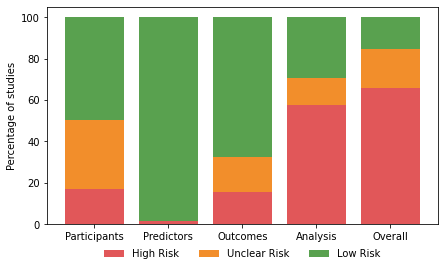

In [28]:
# Probast 

p_participants = list(in_df['Participants'])
p_predictors = list(in_df['Predictors'])
p_outcomes = list(in_df['Outcomes_probast'])
p_analysis = list(in_df['Analysis'])
p_overall = list(in_df['Overall'])

low, unclear, high = 'l', 'u', 'h'

probast_areas = [p_participants, p_predictors, p_outcomes, p_analysis, p_overall]

probast_scores = []

for probast_area in probast_areas:
    probast_area_low_scores = 0
    probast_area_unclear_scores = 0
    probast_area_high_scores = 0
    for score in probast_area:
        if (score==low):
            probast_area_low_scores+=1
        elif (score==high):
            probast_area_high_scores+=1
        elif (score==unclear):
            probast_area_unclear_scores+=1
    probast_area_scores   = [probast_area_low_scores, probast_area_unclear_scores, probast_area_high_scores] 
    probast_scores.append(probast_area_scores)

print('Low overall: ', round(probast_scores[4][0]/288 * 100, 1))
print('Unclear overall: ', round(probast_scores[4][1]/288 * 100, 1))
print('High overall: ', round(probast_scores[4][2]/288 * 100, 1))


print('Participants Low overall: ', round(probast_scores[0][0]/288 * 100, 1))
print('Participants Unclear overall: ', round(probast_scores[0][1]/288 * 100, 1))
print('Participants High overall: ', round(probast_scores[0][2]/288 * 100, 1))


print('Predictors Low overall: ', round(probast_scores[1][0]/288 * 100, 1))
print('Predictors Unclear overall: ', round(probast_scores[1][1]/288 * 100, 1))
print('Predictors High overall: ', round(probast_scores[1][2]/288 * 100, 1))


print('Outcomes Low overall: ', round(probast_scores[2][0]/288 * 100, 1))
print('Outcomes Unclear overall: ', round(probast_scores[2][1]/288 * 100, 1))
print('Outcomes High overall: ', round(probast_scores[2][2]/288 * 100, 1))


print('Analysis Low overall: ', round(probast_scores[3][0]/288 * 100, 1))
print('Analysis Unclear overall: ', round(probast_scores[3][1]/288 * 100, 1))
print('Analysis High overall: ', round(probast_scores[3][2]/288 * 100, 1))


probast_scores = np.array(probast_scores)/288 * 100

import matplotlib.pyplot as plt
 
probast_titles = ['Participants', 'Predictors', 'Outcomes', 'Analysis', 'Overall']
y_high= probast_scores[:, 2]
y_unclear = probast_scores[:, 1]
y_low = probast_scores[:, 0]

plt.bar(probast_titles, y_high, color=good_ok_bad_colors[2], label='High Risk')
plt.bar(probast_titles, y_unclear, bottom=y_high, color=good_ok_bad_colors[1], label='Unclear Risk')
plt.bar(probast_titles, y_low, bottom=y_high+y_unclear, color=good_ok_bad_colors[0], label='Low Risk')

plt.ylabel('Percentage of studies')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol = 3, frameon=False)



[['Title', 245], ['Abstract', 250], ['Background', 288], ['Objectives', 288], ['Data 1', 262], ['Data 2', 86], ['Participants 1', 207], ['Participants 2', 132], ['Participants 3', 125], ['Data Preparation', 256], ['Outcome 1', 256], ['Outcome 2', 112], ['Outcome 3', 98], ['Predictors', 283], ['Sample Size', 143], ['Missing Data', 116], ['Analytical Methods 1', 261], ['Analytical Methods 2', 210], ['Analytical Methods 3', 215], ['Analytical Methods 4', 72], ['Analytical Methods 5', 204], ['Analytical Methods 6', 102], ['Analytical Methods 7', 190], ['Class Imbalance', 26], ['Fairness', 19], ['Model Output', 109], ['Ethics', 205], ['Funding', 199], ['Conflict of Interest', 196], ['Protocol', 20], ['Registration', 156], ['Data Sharing', 110], ['Code Sharing', 93], ['Patient and Public', 2], ['Model Development', 125], ['Model Specification 1', 226], ['Model Specification 2', 138], ['Model Performance', 258], ['Model Updating', 114], ['Interpretation', 287], ['Limitations', 233], ['Usabili

58.50333333333334

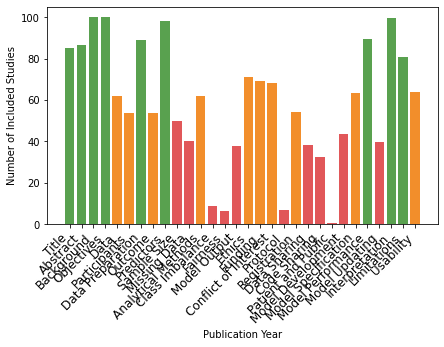

In [30]:
# TRIPOD+AI

tripod_and_ai_cols = {
    "Title (prediction, population, outcome)" : "Title",
    "Abstract  (objectives, design, predictors, outcome, stats, results)": "Abstract",
    "Background (rationale)": "Background",
    "Objectives": "Objectives",
    "Data (Source)": "Data 1",   # COMBO Data
    "Data (Dates)": "Data 2",    # COMBO Data
    "Participants (setting)": "Participants 1",
    "Participants (eligibility)": "Participants 2",
    "Paritcipants (treatments)": "Participants 3",
    "Data Preparation (similar/diff b/w groups?)": "Data Preparation",
    "Outcome (definition, timing)": "Outcome 1",
    "Outcome (subjective)": "Outcome 2",
    "Outcome (blind)": "Outcome 3",
    "Predictors": "Predictors",
    "Participants" : "Sample Size",
    "Participants (characteristics, number with missing data)" : "Missing Data",
    "Analysis (use: eval of model performance?)" : "Analytical Methods 1",
    "Analysis (predictors handling: transforms etc.)" : "Analytical Methods 2",
    "Analysis (model rationale, hyperparam)": "Analytical Methods 3",
    "Analysis (heterogeneity)" : "Analytical Methods 4",
    "Analysis (measures and plots)": "Analytical Methods 5",
    "Analysis (model updating)": "Analytical Methods 6",
    "Analysis (predictions calculation)": "Analytical Methods 7",
    "Class Imbalance methods": "Class Imbalance",
    "Fairness" : "Fairness",
    "Model Output (if classification, what threshold ID?)": "Model Output",
    "Ethical approval" : "Ethics",
    "Funding" : "Funding",
    "Conflicts of Intereset" : "Conflict of Interest",
    "Protocol" : "Protocol",
    "Registration" : "Registration",
    "Data sharing" : "Data Sharing",
    "Code sharing" : "Code Sharing",
    "Patient and Public involvement" : "Patient and Public",
    "Model development (# of participants, event rate)" : "Model Development",
    "Model specification (formula, code, program)" : "Model Specification 1",
    "Model specification (how to use, differences for healthcare)" : "Model Specification 2",
    "Model performance (CI,)" : "Model Performance",
    "Model updating (results)" : "Model Updating",
    "Interpretation" : "Interpretation",
    "Limitations" : "Limitations",
    "Usability (poor input)": "Usability 1",
    "Usability (interaction/expertise)" : "Usability 2",
    "Usability (future steps)" : "Usability 3",
}

col_sums = []
for key, value in tripod_and_ai_cols.items():
    col_data = list(in_df[key])
    col_sum = 0
    for val in col_data:
        if (val==1 or val=='l'):
            col_sum+=1
    col_sums.append([value, col_sum])
print(col_sums)
final_titles = [
    "Title",
    "Abstract",
    "Background",
    "Objectives",
    "Data",
    "Participants",
    "Data Preparation",
    "Outcome",
    "Predictors",
    "Sample Size",
    "Missing Data",
    "Analytical Methods",
    "Class Imbalance",
    "Fairness",
    "Model Output",
    "Ethics",
    "Funding",
    "Conflict of Interest",
    "Protocol",
    "Registration",
    "Data Sharing",
    "Code Sharing",
    "Patient and Public",
    "Model Development",
    "Model Specification",
    "Model Performance",
    "Model Updating",
    "Interpretation",
    "Limitations",
    "Usability",
]

tripod_final_scores = []
for final_title in final_titles:
    n=0
    score_counter = 0
    for title, col_sum in col_sums:
        if title.startswith(final_title):
            n+=1
            score_counter+=col_sum
    tripod_final_scores.append([final_title, round((score_counter/n)/(288) * 100, 1)])

tripod_titles, tripod_scores= [x[0] for x in tripod_final_scores], [x[1] for x in tripod_final_scores]

def colormap_scores(score):
    if score > 75:
        return good_ok_bad_colors[0]
    elif score > 50: 
        return good_ok_bad_colors[1]
    else:
        return good_ok_bad_colors[2]
plt.bar(tripod_titles, tripod_scores, color=[colormap_scores(x) for x in tripod_scores])
plt.ylabel('Number of Included Studies')
plt.xlabel('Publication Year')
plt.xticks(rotation=45, ha="right", size=12)

np.mean(tripod_scores)
    

## The remaining code is just for creating the combo plots

$\leq 2018$ 0.0 50.2
$2019-2020$ 8.3 51.7
$2021-2022$ 21.0 58.4
$2023-2024$ 14.8 62.2
Title 85.1
Abstract 86.8
Background 100.0
Objectives 100.0
Data 62.0
Participants 53.7
Data Preparation 88.9
Outcome 53.9
Predictors 98.3
Sample Size 49.7
Missing Data 40.3
Analytical Methods 62.2
Class Imbalance 9.0
Fairness 6.6
Model Output 37.8
Ethics 71.2
Funding 69.1
Conflict of Interest 68.1
Protocol 6.9
Registration 54.2
Data Sharing 38.2
Code Sharing 32.3
Patient and Public 0.7
Model Development 43.4
Model Specification 63.2
Model Performance 89.6
Model Updating 39.6
Interpretation 99.7
Limitations 80.9
Usability 63.7


/var/folders/xy/28nns8yx3pnclklk9nkqszlr0000gn/T/ipykernel_74291/3231029518.py:211: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


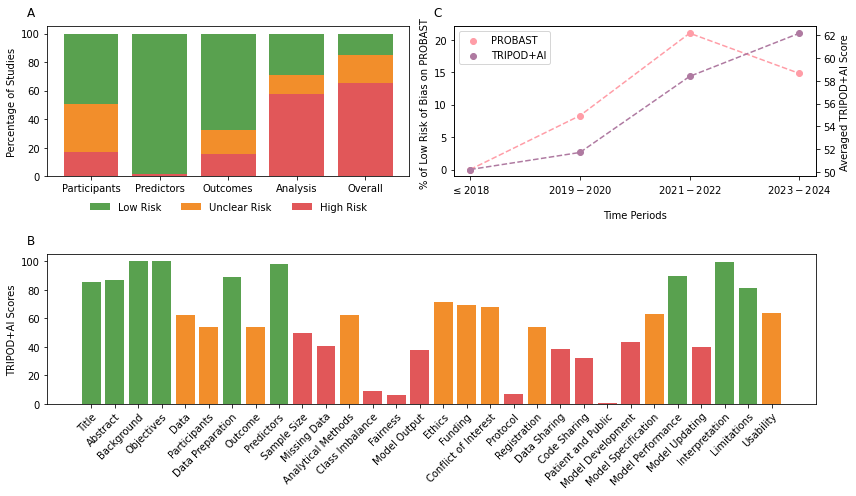

In [34]:


from matplotlib.colors import Colormap


def compute_probast_score(time_df):
    num_studies, _ = time_df.shape
    p_participants = list(time_df['Participants'])
    p_predictors = list(time_df['Predictors'])
    p_outcomes = list(time_df['Outcomes_probast'])
    p_analysis = list(time_df['Analysis'])
    p_overall = list(time_df['Overall'])

    low, unclear, high = 'l', 'u', 'h'

    probast_areas = [p_participants, p_predictors, p_outcomes, p_analysis, p_overall]

    scores = []

    for probast_area in probast_areas:
        probast_area_low_scores = 0
        probast_area_unclear_scores = 0
        probast_area_high_scores = 0
        for score in probast_area:
            if (score==low):
                probast_area_low_scores+=1
            elif (score==high):
                probast_area_high_scores+=1
            elif (score==unclear):
                probast_area_unclear_scores+=1
        probast_area_scores   = [probast_area_low_scores, probast_area_unclear_scores, probast_area_high_scores] 
        scores.append(probast_area_scores)
    scores = np.array(scores)/num_studies * 100

    return scores[4][0]

def compute_tripod_score(time_df):
    num_studies, _ = time_df.shape
    tripod_and_ai_cols = {
        "Title (prediction, population, outcome)" : "Title",
        "Abstract  (objectives, design, predictors, outcome, stats, results)": "Abstract",
        "Background (rationale)": "Background",
        "Objectives": "Objectives",
        "Data (Source)": "Data 1",   # COMBO Data
        "Data (Dates)": "Data 2",    # COMBO Data
        "Participants (setting)": "Participants 1",
        "Participants (eligibility)": "Participants 2",
        "Paritcipants (treatments)": "Participants 3",
        "Data Preparation (similar/diff b/w groups?)": "Data Preparation",
        "Outcome (definition, timing)": "Outcome 1",
        "Outcome (subjective)": "Outcome 2",
        "Outcome (blind)": "Outcome 3",
        "Predictors": "Predictors",
        "Participants" : "Sample Size",
        "Participants (characteristics, number with missing data)" : "Missing Data",
        "Analysis (use: eval of model performance?)" : "Analytical Methods 1",
        "Analysis (predictors handling: transforms etc.)" : "Analytical Methods 2",
        "Analysis (model rationale, hyperparam)": "Analytical Methods 3",
        "Analysis (heterogeneity)" : "Analytical Methods 4",
        "Analysis (measures and plots)": "Analytical Methods 5",
        "Analysis (model updating)": "Analytical Methods 6",
        "Analysis (predictions calculation)": "Analytical Methods 7",
        "Class Imbalance methods": "Class Imbalance",
        "Fairness" : "Fairness",
        "Model Output (if classification, what threshold ID?)": "Model Output",
        "Ethical approval" : "Ethics",
        "Funding" : "Funding",
        "Conflicts of Intereset" : "Conflict of Interest",
        "Protocol" : "Protocol",
        "Registration" : "Registration",
        "Data sharing" : "Data Sharing",
        "Code sharing" : "Code Sharing",
        "Patient and Public involvement" : "Patient and Public",
        "Model development (# of participants, event rate)" : "Model Development",
        "Model specification (formula, code, program)" : "Model Specification 1",
        "Model specification (how to use, differences for healthcare)" : "Model Specification 2",
        "Model performance (CI,)" : "Model Performance",
        "Model updating (results)" : "Model Updating",
        "Interpretation" : "Interpretation",
        "Limitations" : "Limitations",
        "Usability (poor input)": "Usability 1",
        "Usability (interaction/expertise)" : "Usability 2",
        "Usability (future steps)" : "Usability 3",
    }

    col_sums = []
    for key, value in tripod_and_ai_cols.items():
        col_data = list(time_df[key])
        col_sum = 0
        for val in col_data:
            if (val==1 or val=='l'):
                col_sum+=1
        col_sums.append([value, col_sum])

    final_titles = [
        "Title",
        "Abstract",
        "Background",
        "Objectives",
        "Data",
        "Participants",
        "Data Preparation",
        "Outcome",
        "Predictors",
        "Sample Size",
        "Missing Data",
        "Analytical Methods",
        "Class Imbalance",
        "Fairness",
        "Model Output",
        "Ethics",
        "Funding",
        "Conflict of Interest",
        "Protocol",
        "Registration",
        "Data Sharing",
        "Code Sharing",
        "Patient and Public",
        "Model Development",
        "Model Specification",
        "Model Performance",
        "Model Updating",
        "Interpretation",
        "Limitations",
        "Usability",
    ]
    
    final_scores = []
    for final_title in final_titles:
        n=0
        score_counter = 0
        for title, col_sum in col_sums:
            if title.startswith(final_title):
                n+=1
                score_counter+=col_sum
        final_scores.append([final_title, round((score_counter/n)/(num_studies) * 100, 1)])

    titles, scores= [x[0] for x in final_scores], [x[1] for x in final_scores]
    scores = np.array(scores)
    return np.mean(scores)#, np.std(scores)


years_less_than_2018 = [2000 + x for x in range (6,19)]
years_2019_2020 = [2019, 2020]
years_2021_2022 = [2021, 2022]
years_2023_2024 = [2023, 2024]


year_periods = [years_less_than_2018, years_2019_2020, years_2021_2022, years_2023_2024]
year_titles = ['$\leq 2018$', '$2019-2020$', '$2021-2022$', '$2023-2024$']

years = []
year_counts = []
combo_probast_scores = []
combo_tripod_scores = []
for period, year_name in zip(year_periods, year_titles):
    year_df = in_df[in_df['Published Year'].isin(period)]
    year_count, _ = year_df.shape
    probast_low_risk = round(compute_probast_score(year_df), 1)
    tripod_ai_score = round(compute_tripod_score(year_df), 1)
    print(year_name, probast_low_risk, tripod_ai_score)
    years.append(year_name)
    year_counts.append(year_count)
    combo_probast_scores.append(probast_low_risk)
    combo_tripod_scores.append(tripod_ai_score)

plt.rcParams["figure.figsize"] = (12,7)


fig, axs = plt.subplot_mosaic([['A', 'C'], ['B', 'B']],
                              layout='constrained')
for (label, ax) in axs.items():
    ax.text(
        0.0, 1.0, label, transform=(
            ax.transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
        fontsize='large', va='bottom', fontfamily='DejaVu Sans')
[_, ax0], [_, ax2], [_, ax1]= axs.items()



ax0.bar(probast_titles, y_low, bottom=y_high+y_unclear, color=good_ok_bad_colors[0], label='Low Risk')
ax0.bar(probast_titles, y_unclear, bottom=y_high, color=good_ok_bad_colors[1], label='Unclear Risk')
ax0.bar(probast_titles, y_high, color=good_ok_bad_colors[2], label='High Risk')
ax0.set_ylabel('Percentage of Studies')
ax0.legend(bbox_to_anchor=(0.5, -0.3), loc='lower center', ncol = 3, frameon=False)


for tripod_title, tripod_score in zip(tripod_titles, tripod_scores):
    print(tripod_title, tripod_score)
ax1.bar(tripod_titles, tripod_scores, color=[colormap_scores(x) for x in tripod_scores])
ax1.set_ylabel('TRIPOD+AI Scores')
ax1.set_xticks(range(len(tripod_titles)), labels=tripod_titles,
              rotation=45, ha="right", rotation_mode="anchor")
# ax1.tick_params(axis='x', rotation=45, ha="center", labelsize=10)

year_counts = [x/100 for x in year_counts]
# ax2.bar(years, year_counts)
para2 = ax2.twinx()
probast_pts = ax2.scatter(years, combo_probast_scores, c=colors[-1], label="PROBAST")
ax2.plot(years, combo_probast_scores, '--', c=colors[-1])
ax2.set_ylabel('% of Low Risk of Bias on PROBAST ')
tripod_pts = para2.scatter(years, combo_tripod_scores, c=colors[-2], label="TRIPOD+AI")
para2.plot(years, combo_tripod_scores, '--', c=colors[-2])
para2.set_ylabel('Averaged TRIPOD+AI Score', position="right")
para2.yaxis.set_major_formatter(FormatStrFormatter('%.0f')) ## Makes X-axis label with two decimal points

pts = [probast_pts, tripod_pts]
labs = [pt.get_label() for pt in pts]
ax2.legend(pts, labs, loc='upper left')
# para2.set_xticks([])
ax2.set_xlabel('Time Periods', labelpad=15)

plt.tight_layout()

clin trial 1
CNN
ANN (Be Easy to Use/BETU based on YOLOv4)
CNN
CNN (Gaussian mixture model)
ImageNet
CNN: EfficientNet
YOLOv5 (detection)
Cascade R-CNN
R-CNN
CNN
CNN
CNN
VGG-16
VGG  
DesNet
CNN
Multi-modal CNN
VGG
RestNet
CNN
Xception
R-CNN
R-CNN
YOLOv5  
Custome: CNN
ResNet
Custom CNN
Custom CNN (with decoder encoder blocks)
MobileNet
ResNet
DCNN (mod to include pt factors)
CNN (Pretrained)
Custom CNN
Custome CNN 
Xception
MobileNet
CNN
Dense CNN
CNN
Custom CNN
Custom CNN  
Custom CNN
CNN
CNN   
CNN
CNN 
CNN
CNN (segmentation)
CNN 
YOLOV 
CNN 
EfficientNet 
Custom CNN 
RCNN  
Feature Augment Network: ResNet
YOLOV 
CNN
EfficientNet
CNN
ResNet 
Custom CNN 
Custom CNN  
CNN (with spatial and color attention modules)
Mask-RCNN 
CNN 
CNN 
Bi-directional LSTM (w/ RCNN)
RCNN  
Custom CNN
Segmentation: RCNN. Diagnosis: CNN (AlexNEt)
CNN 
Software (Encord) based on Mask RCNN 
Deep CNN 
CNN for guidewire-compliant control method 
SegNet 
Fast RCNN 
CNN (with residual connections)
DETR and YOLOv

/var/folders/xy/28nns8yx3pnclklk9nkqszlr0000gn/T/ipykernel_74291/244151984.py:154: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


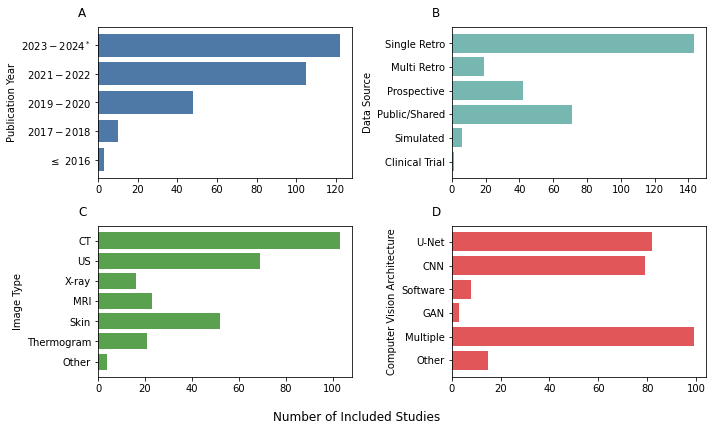

In [35]:
""" 
Time Periods:
<= 2016
2017-2018
2019-2020
2021-2022
2023-2024
"""

yr_titles = [
    "$\leq$ 2016",
    "$2017-2018$",
    "$2019-2020$",
    '$2021-2022$',
    '$2023-2024^*$'
]
pre_2016 = 3
yrs = [
    [2017,2018],
    [2019,2020],
    [2021,2022],
    [2023,2024]
]

yr_vals = [pre_2016]
for yr in yrs:
    yr1, yr2 = yr
    yr_df = in_df[(in_df['Published Year']==yr2) | ((in_df['Published Year']==yr1))]
    yr_num = yr_df.shape[0]
    yr_vals.append(yr_num)


retro_single_kw = ['Retrospective (single)','Retrospective', 'Retropsective', 'Retrospective ',] 
retro_multi_kw  = ['Retrospective (multi)',]
prospective_kw = ['Prospective (single)', 'Prospective  ',  'Prospective (randomized, single-blind)', 'Prospective (multicenter)', 'Prospective', 'Prospective ',  'Prospective multicenter ']
public_kw = ['Open source (web-indexed search)', 'Public ', 'Other Uni dataset  ',  'Public (5)', 'Public (2) ', 'Public + Retropsective', 'Public  ', 'Public (Kaggle DFU-dataset)', 'Public (3)', 'Public (MICCAI)', 'Public',  'Public (MICCAI, NIH)',  'Public (2 datasets)', 'Public (4 datasets)',  'Public (DFUC) + Retrospective (single)',    'Other Uni datasets (chronic foot ulcer and Breast Ca dataset)',]
simulated_kw = ['Simulated dataset', 'Simulated dataset (phantom and porcine)',  'Simulated dataset (phantom) + Public ',  'Simulated (phantom)', 'Simulated dataset (phantom)', 'Simulated dataset (synthetic data for training, real data for validation)  ',]
clinical_trial_kw = ['Clinical Trial (non-randomized)']
       
n_retro_single, n_retro_multi, n_prospective, n_public, n_simulated, n_clinical_trial = 0,0,0,0,0,0

source_counters = [n_retro_single, n_retro_multi, n_prospective, n_public, n_simulated, n_clinical_trial ]
kws = [retro_single_kw, retro_multi_kw, prospective_kw, public_kw, simulated_kw, clinical_trial_kw]
source_titles = ['Single Retro', 'Multi Retro', 'Prospective', 'Public/Shared', 'Simulated', 'Clinical Trial']

for ix, x in enumerate(list(in_df['Data Source'])):
    for counter, kw in zip(range(len(source_counters)), kws):
        for y in kw:
            if x==y:
                source_counters[counter]+=1 

print('clin trial', source_counters[5])

img_types = in_df['Image Type']

ct = ['CT', 'CTA', 'NCCT']
xr = ['X-ray', 'DSA', 'radiograph', 'Xray', 'Cine-angiograms']
us = ['US', 'Us']
mri = ['MRI', 'MRA']
skin = ['Skin image', 'Skin iamges', 'RBG-D']
thermograph = ['Thermogram', 'Thermograph', 'Infrared', 'infrared', 'thermogram', 'IR']

def part_of(str, lst):
    return any([(x in str) for x in lst])

ct_c, xr_c, us_c, mri_c, skin_c, thermograph_c= 0,0,0,0,0,0
rest_c = 0

for img in img_types:
    if part_of(img, mri):
        mri_c+=1
    elif part_of(img, ct):
        ct_c+=1
    elif part_of(img, xr):
        xr_c+=1
    elif part_of(img, us):
        us_c+=1
    elif part_of(img, thermograph):
        thermograph_c+=1
    elif part_of(img, skin):
        skin_c+=1
    else:
        rest_c+=1


img_titles = ['CT', 'US', 'X-ray', 'MRI', 'Skin', 'Thermogram', 'Other']
img_counters = ct_c, us_c, xr_c, mri_c, skin_c, thermograph_c, rest_c


architectures = list(in_df['CV Architecture'])

unets_kws = ['Unet', 'U-net', 'U-Net', 'UNet']
cnn_kws = ['CNN', 'YOLO', 'VGG', 'DesNet', 'ImageNet', 'Xception', 'MobileNet', 'EfficientNet', 'SegNet', 'ResNet', 'resnet', 'Resnet', 'RestNet']
Ensemble_kws = ['Ensemble', ',', '+']
software_kws = ['software', 'Software']
GAN_kws = ['Generative adversarial network', 'gan', 'GAN']


u_net, cnn, software, ensemble, gan, rest_arch= 0,0,0, 0, 0, 0

def part_of(str, lst):
    return any([(x in str) for x in lst])

for arch in architectures:
    if part_of(arch, Ensemble_kws):
        ensemble+=1
    elif part_of(arch, unets_kws):
        u_net+=1
    elif part_of(arch, cnn_kws):
        print(arch)
        cnn+=1
    elif part_of(arch, software_kws):
        software+=1
    elif part_of(arch, GAN_kws):
        gan+=1
    else:
        if not(arch=='NR'):
            rest_arch+=1

arch_titles = ['U-Net', 'CNN','Software', 'GAN', 'Multiple', 'Other']
arch_counters = [u_net, cnn, software, gan, ensemble, rest_arch]


fig, axs = plt.subplot_mosaic([['A', 'B'], ['C', 'D']],
                              layout='constrained')
for (label, ax) in axs.items():
    ax.text(
        0.0, 1.0, label, transform=(
            ax.transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
        fontsize='large', va='bottom', fontfamily='DejaVu Sans')
[_, ax0], [_, ax1], [_, ax2], [_, ax3]= axs.items()

fig.set_size_inches(10, 6)

ax0.barh(yr_titles, yr_vals, color=colors[0])
# ax0.invert_yaxis()
ax0.set_ylabel('Publication Year')

ax1.barh(source_titles, source_counters, color=colors[3])
ax1.invert_yaxis()
ax1.set_ylabel('Data Source')

ax2.barh(img_titles, img_counters, color=colors[4])
ax2.invert_yaxis()
ax2.set_ylabel('Image Type')


ax3.barh(arch_titles, arch_counters, color=colors[2])
ax3.invert_yaxis()
ax3.set_ylabel('Computer Vision Architecture')


fig.supxlabel('Number of Included Studies')
plt.tight_layout()




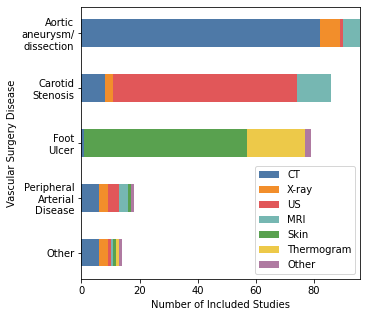

In [82]:
# Plot for Diseases and their Image

aortic_kws = ['Abdominal Aortic dissection','Aorta (dissection and aneurysm)', 'General (vessel segmentation), eval on AAA dataset ', 'Aortic dissection (A and B)', 'REBOA ', 'EVAR   ',  'Aortic disease ','Aoritc disease (dissection, IMH + atherosclerotic aortic ulcer)','Aorta  + dissections (A/B) ', 'TBAD ', 'Aorta     ', 'EVAR ','Aorta  ', 'Aorta ','Aortic aneurysms', 'Aortic dissection  ', 'Aortic disease (aneurysm + dissection)', 'Aortic dissection ','EVAR (endoleaks)', 'Aortic dissection (Type B and Type A) + rupture','General (aorta)','Aoritc dissection  ','Aortic aneurysm ', 'TEVAR', 'EVAR, AAA', 'General (aorta segmentation)', 'EVAR, endoleaks','Aortic aneurysm','Thoracic aortic aneurysm''Aortic disease (dissection + rupture)', 'Aorta (thoracic), aortic aneurysm', 'Aorta (ascending - abdominal)', 'AAA (EVAR)', 'Type B Aortic Dissection', 'AAA', 'EVAR', 'FEVAR for complex AAAs', 'Type B Aortic Dissection, TEVAR', 'Aortic dissection (Type B and Type A)', 'AAA (infrarenal)', 'AAA ',]
carotid_kws = ['Carotid stenosis',  'Carotid stenosis ',]
PAD_kws= ['PAD (femoral popliteal disease)',   'PAD (femoral + tibial artery)',  'Popliteal artery aneurysms', 'PAD (femoral)','PAD (femoral endarteretcomy)', 'PAD ', 'PAD', 'PAD (SFA)', 'PAD (Drug coated balloon stent)', 'PAD (Amputation wound healing)', 'EVAR, PAD',]
foot_ulcer_kws = ['Diabetic Foot', 'Leg ulcer (Diabetic foot)', 'Leg ulcer','Diabetic foot', 'Diabetic Foot (infjection)', 'Leg ulcer (venous)', 'General (vasccular dz: foot ulcer but also breast Ca cases)','Leg ulcer ', 'Foot ulcer',]
visceral_kws = ['Visceral arterial aneurysms', 'Superior Mesenteric Artery abnormalities ',]

venous_kws = ['Chronic Venous Insufficiency',  'Varicose ulcers ',]
vasc_gen_kws = ['Aortic disease and carotid stenosis ', 'General (vessel segmentation)', 'General (vscular tress segmentation']

procedural = ['Mechanical thrombectomy', 'Vascular stents', 'Catheter']

lymphedema_kws = ['Lymphedema']

ct = ['CT', 'CTA', 'NCCT']
xr = ['X-ray', 'DSA', 'radiograph', 'Xray', 'Cine-angiograms']
us = ['US', 'Us']
mri = ['MRI', 'MRA']
skin = ['Skin image', 'Skin iamges', 'RBG-D']
thermograph = ['Thermogram', 'Thermograph', 'Infrared', 'infrared', 'thermogram', 'IR']
other_img=['Photoacoustic imaging', 'Laser speckle imaging', 'Multispectral imaging', 'Hyperspectral images' ]


other_kws = venous_kws + visceral_kws + vasc_gen_kws + lymphedema_kws + procedural
disease_kws = [aortic_kws, carotid_kws, foot_ulcer_kws, PAD_kws, other_kws]
titles = ['Aortic\naneurysm/\ndissection', 'Carotid\nStenosis', 'Foot\nUlcer', 'Peripheral\nArterial\nDisease', 'Other']
img_kws = [ct, xr, us, mri, skin, thermograph, other_img]

img_types = in_df['Image Type']

ct = ['CT', 'CTA', 'NCCT']
xr = ['X-ray', 'DSA', 'radiograph', 'Xray', 'Cine-angiograms']
us = ['US', 'Us']
mri = ['MRI', 'MRA']
skin = ['Skin image', 'Skin iamges', 'RBG-D']
thermograph = ['Thermogram', 'Thermograph', 'Infrared', 'infrared', 'thermogram', 'IR']

def part_of(str, lst):
    return any([(x in str) for x in lst])

all_disease_nums = []
for disease_kw in disease_kws:
    disease_nums = []
    for img_kw in img_kws:
        img_counter = 0
        disease_df = in_df[in_df['Vascular Disease/Procedure'].isin(disease_kw)]
        disease_img_df = disease_df['Image Type']
        for img in disease_img_df:
            if part_of(img, img_kw):
                img_counter+=1
        disease_img_number = img_counter
        disease_nums.append(disease_img_number)

    all_disease_nums.append(disease_nums)
    
all_disease_nums = np.array(all_disease_nums)
y0, y1, y2, y3, y4, y5, y6= all_disease_nums[:, 0], all_disease_nums[:, 1], all_disease_nums[:, 2], all_disease_nums[:, 3], all_disease_nums[:, 4], all_disease_nums[:, 5], all_disease_nums[:, 6]
x=titles

plt.barh(x, y0, color=colors[0], label='CT', height=0.5)
plt.barh(x, y1, left=y0, color=colors[1], label='X-ray', height=0.5)
plt.barh(x, y2, left=y0+y1, color=colors[2], label='US', height=0.5)
plt.barh(x, y3, left=y0+y1+y2, color=colors[3], label='MRI', height=0.5)
plt.barh(x, y4, left=y0+y1+y2+y3, color=colors[4], label='Skin', height=0.5)
plt.barh(x, y5, left=y0+y1+y2+y3+y4, color=colors[5], label='Thermogram', height=0.5)
plt.barh(x, y6, left=y0+y1+y2+y3+y4+y5, color=colors[6], label='Other', height=0.5)
plt.gca().invert_yaxis()
plt.legend(loc='lower right')
plt.xlabel('Number of Included Studies')
plt.ylabel('Vascular Surgery Disease')
fig.set_size_inches(10, 6)

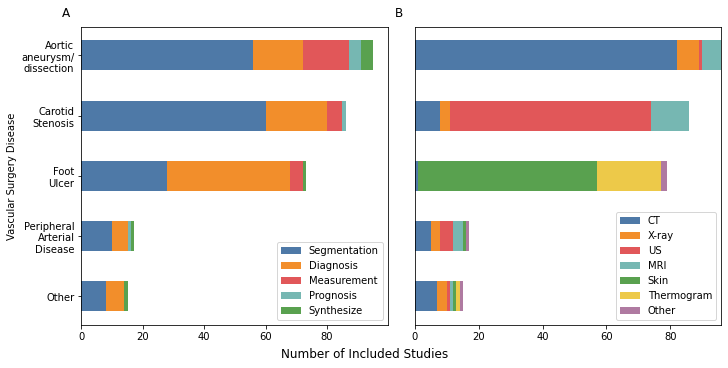

In [83]:
# 
fig, axs = plt.subplot_mosaic([['A', 'B']],
                              layout='constrained')
for (label, ax) in axs.items():
    ax.text(
        0.0, 1.0, label, transform=(
            ax.transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
        fontsize='large', va='bottom', fontfamily='DejaVu Sans')
[_, ax1], [_, ax0] = axs.items()

fig.set_size_inches(10, 5)

fig.supxlabel('Number of Included Studies')

aortic_kws = ['Abdominal Aortic dissection','Aorta (dissection and aneurysm)', 'General (vessel segmentation), eval on AAA dataset ', 'Aortic dissection (A and B)', 'REBOA ', 'EVAR   ',  'Aortic disease ','Aoritc disease (dissection, IMH + atherosclerotic aortic ulcer)','Aorta  + dissections (A/B) ', 'TBAD ', 'Aorta     ', 'EVAR ','Aorta  ', 'Aorta ','Aortic aneurysms', 'Aortic dissection  ', 'Aortic disease (aneurysm + dissection)', 'Aortic dissection ','EVAR (endoleaks)', 'Aortic dissection (Type B and Type A) + rupture','General (aorta)','Aoritc dissection  ','Aortic aneurysm ', 'TEVAR', 'EVAR, AAA', 'General (aorta segmentation)', 'EVAR, endoleaks','Aortic aneurysm','Thoracic aortic aneurysm''Aortic disease (dissection + rupture)', 'Aorta (thoracic), aortic aneurysm', 'Aorta (ascending - abdominal)', 'AAA (EVAR)', 'Type B Aortic Dissection', 'AAA', 'EVAR', 'FEVAR for complex AAAs', 'Type B Aortic Dissection, TEVAR', 'Aortic dissection (Type B and Type A)', 'AAA (infrarenal)', 'AAA ',]
carotid_kws = ['Carotid stenosis',  'Carotid stenosis ',]
PAD_kws= ['PAD (femoral popliteal disease)',   'PAD (femoral + tibial artery)',  'Popliteal artery aneurysms', 'PAD (femoral)','PAD (femoral endarteretcomy)', 'PAD ', 'PAD', 'PAD (SFA)', 'PAD (Drug coated balloon stent)', 'PAD (Amputation wound healing)',]
foot_ulcer_kws = ['Diabetic Foot', 'Leg ulcer (Diabetic foot)', 'Leg ulcer','Diabetic foot', 'Diabetic Foot (infjection)', 'Leg ulcer (venous)', 'General (vasccular dz: foot ulcer but also breast Ca cases)','Leg ulcer ', 'Foot ulcer',]
visceral_kws = ['Visceral arterial aneurysms', 'Superior Mesenteric Artery abnormalities ',]
venous_kws = ['Chronic Venous Insufficiency',  'Varicose ulcers ',]
vasc_gen_kws = ['Aortic disease and carotid stenosis ', 'General (vessel segmentation)', 'General (vscular tress segmentation', 'EVAR, PAD',]
procedural = ['Mechanical thrombectomy', 'Vascular stents', 'Catheter']
lymphedema_kws = ['Lymphedema']
other_kws = venous_kws + visceral_kws + vasc_gen_kws + lymphedema_kws + procedural
disease_kws = [aortic_kws, carotid_kws, foot_ulcer_kws, PAD_kws, other_kws]
dz_titles = ['Aortic\naneurysm/\ndissection', 'Carotid\nStenosis', 'Foot\nUlcer', 'Peripheral\nArterial\nDisease', 'Other']

ct = ['CT', 'CTA', 'NCCT']
xr = ['X-ray', 'DSA', 'radiograph', 'Xray', 'Cine-angiograms']
us = ['US', 'Us']
mri = ['MRI', 'MRA']
skin = ['Skin image', 'Skin iamges', 'RBG-D']
thermograph = ['Thermogram', 'Thermograph', 'Infrared', 'infrared', 'thermogram', 'IR']
other_img=['Photoacoustic imaging', 'Laser speckle imaging', 'Multispectral imaging', 'Hyperspectral images' ]
img_kws = [ct, xr, us, mri, skin, thermograph, other_img]
img_titles = ['CT', 'X-ray', 'US', 'MRI', 'Skin', 'Thermogram', 'Other']

def part_of(str, lst):
    return any([(x in str) for x in lst])


all_disease_nums = []
for disease_kw in disease_kws:
    disease_nums = []
    for img_kw in img_kws:
        img_counter = 0
        disease_df = in_df[in_df['Vascular Disease/Procedure'].isin(disease_kw)]
        disease_img_df = disease_df['Image Type']
        for img in disease_img_df:
            if part_of(img, img_kw):
                img_counter+=1
        disease_img_number = img_counter
        disease_nums.append(disease_img_number)

    all_disease_nums.append(disease_nums)
    
all_disease_nums = np.array(all_disease_nums)

y0, y1, y2, y3, y4, y5, y6= all_disease_nums[:, 0], all_disease_nums[:, 1], all_disease_nums[:, 2], all_disease_nums[:, 3], all_disease_nums[:, 4], all_disease_nums[:, 5], all_disease_nums[:, 6],
x=titles

ax0.barh(x, y0, color=colors[0], label=img_titles[0], height=0.5)
ax0.barh(x, y1, left=y0, color=colors[1], label=img_titles[1], height=0.5)
ax0.barh(x, y2, left=y0+y1, color=colors[2], label=img_titles[2], height=0.5)
ax0.barh(x, y3, left=y0+y1+y2, color=colors[3], label=img_titles[3], height=0.5)
ax0.barh(x, y4, left=y0+y1+y2+y3, color=colors[4], label=img_titles[4], height=0.5)
ax0.barh(x, y5, left=y0+y1+y2+y3+y4, color=colors[5], label=img_titles[5], height=0.5)
ax0.barh(x, y6, left=y0+y1+y2+y3+y4+y5, color=colors[6], label=img_titles[6], height=0.5)
ax0.invert_yaxis()
ax0.legend(loc='lower right')
ax0.set_yticks([])

# 
other_kws = venous_kws + visceral_kws + vasc_gen_kws + lymphedema_kws + procedural
disease_kws = [aortic_kws, carotid_kws, foot_ulcer_kws, PAD_kws, other_kws]
titles = ['Aortic\naneurysm/\ndissection', 'Carotid\nStenosis', 'Foot\nUlcer', 'Peripheral\nArterial\nDisease', 'Other']
purpose_kws = [segment_kws, diagnosis_kws, measurement_kws, prognosis_kws, synthetic_kws]

all_disease_nums = []
for disease_kw in disease_kws:
    disease_nums = []
    for purpose_kw in purpose_kws:
        disease_df = in_df[in_df['Vascular Disease/Procedure'].isin(disease_kw)]
        disease_purpose_df = disease_df[disease_df['Purpose'].isin(purpose_kw)]
        disease_purpose_number = disease_purpose_df.shape[0]
        disease_nums.append(disease_purpose_number)

    all_disease_nums.append(disease_nums)
    
all_disease_nums = np.array(all_disease_nums)

y0, y1, y2, y3, y4= all_disease_nums[:, 0], all_disease_nums[:, 1], all_disease_nums[:, 2], all_disease_nums[:, 3], all_disease_nums[:, 4]
x=titles

ax1.barh(x, y0, color=colors[0], label='Segmentation', height=0.5)
ax1.barh(x, y1, left=y0, color=colors[1], label='Diagnosis', height=0.5)
ax1.barh(x, y2, left=y0+y1, color=colors[2], label='Measurement', height=0.5)
ax1.barh(x, y3, left=y0+y1+y2, color=colors[3], label='Prognosis', height=0.5)
ax1.barh(x, y4, left=y0+y1+y2+y3, color=colors[4], label='Synthesize', height=0.5)
ax1.invert_yaxis()
ax1.set_ylabel('Vascular Surgery Disease')
ax1.legend(loc='lower right')